<a href="https://colab.research.google.com/github/imantsdlv/imantsdlv/blob/main/Kaggle_EDA_of_LV_Business_Register_400kLLC_1991_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Life & Death of 400k Companies: An Exploratory Data Analysis (EDA) of the Latvian Business Register (1991-2024)

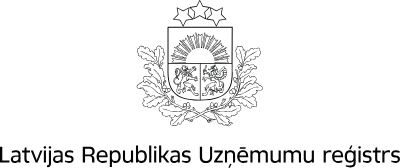

# ℹ️ Introduction

What can the lifecycle of over **400,000 companies** tell us about a country's **33-year journey (1991-2024)** from a post-Soviet state to a modern European Union member? This notebook seeks to demonstrate how raw data from Latvia's Commercial Register hides a compelling narrative of over three decades of national development. This project particularly emphasizes **the power of data storytelling to bring these hidden economic**, legislative, and even behavioral stories to light.

Using **Python programming language** for data manipulation and Seaborn for rich, visualizations, we dive deep into the register to uncover the fascinating evolution of Latvia's business landscape since its renewed independence.

## The Dataset

The data is sourced from Latvia's public data portal ([data.gov.lv](https://data.gov.lv/dati/lv/dataset/uz)) and contains information on all registered legal entities, including their registration date, termination date, legal form, and name. **This analysis focuses on the journey of over 400,000 companies from 1991 to December 31, 2024.**

## Key Questions & Insights Uncovered

This Exploratory Data Analysis (EDA) answers several key questions, revealing a multi-act story of economic evolution:

* **The "Pioneer Era":** What does a massive spike in "Farmer's Farm" (`ZEM`) registrations in 1992 tell us about the fall of the Soviet Union?
* **The "Great Substitution":** How did a change in law around 2002 cause one type of business (`IND`) to vanish overnight and be replaced by another (`IK`)? We visualize the perfect "X" pattern this created.
* **Two Crises, Two Stories:** We prove that the **1998 Russian Crisis** and the **2008 Global Financial Crisis** were fundamentally different events. The 1998 crisis was a "sniper" that wiped out a specific generation of young companies, while the 2008 crisis was a "carpet bomb" that destroyed a much wider and older range of businesses.
* **The Zombie Company Apocalypse:** We investigate the massive spike in company terminations from 2016-2019 and show that it wasn't an economic collapse, but a deliberate government-led "regulatory cleanup" of tens of thousands of dormant companies.
* **The Health of the Ecosystem:** Is the Latvian business population getting older or younger? Is the risk for a new startup increasing? We explore these questions by analyzing the "infant mortality" rate and the median age of active firms over time.
* **Micro-Patterns:** We even look at the "rhythm" of business, uncovering the busiest days of the week for new registrations.

This notebook is a testament to how much history and insight can be extracted from a single, well-structured dataset. Feel free to fork the notebook, leave comments, or suggest other avenues for analysis!

# 📡 Import data, libraries and prepare data

In [2]:
# Install the ckanapi library to Fetch data
!pip install ckanapi

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 1.8 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=72c9c0b445342ff7bcd01ddd93d00a8340e2f218e98d408aa1fcf7f497dde47d
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt


In [3]:
# === Import libraries ===
import numpy as np
import pandas as pd
import calendar
from datetime import timedelta

from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import string

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

from ckanapi import RemoteCKAN

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Fetch Data for resource: 25e80bf3-f107-4ab4-89ef-251b5b9374e9
def get_all_resource_data(resource_id):

        # 1. Establish a connection to the CKAN portal.
    ua = 'ckanapiexample/1.0 (+http://example.com/my/website)'
    ckan = RemoteCKAN('https://data.gov.lv/dati/lv/', user_agent=ua)

    all_records = []
    chunk_size = 20000
    offset = 0

    print(f"📡 Starting data Fetching for resource: {resource_id}")

    try:
        while True:
            # 2. Fetch a chunk of data from the datastore.
            response = ckan.action.datastore_search(
                resource_id=resource_id,
                limit=chunk_size,
                offset=offset
            )

            # Extract records from the current chunk
            records = response.get('records', [])

            if not records:
                # If no records are returned, we've reached the end.
                print("☑️ No more records to fetch.")
                break

            # 3. Add the fetched records to our main list.
            all_records.extend(records)
            print(f"➡ Fetched {len(records)} records. Total records so far: {len(all_records)}")

            # 4. Prepare for the next chunk by increasing the offset.
            offset += chunk_size

        print(f"\n☑️ Successfully imported {len(all_records)} total records.")
        return all_records

    except Exception as e:
        print(f"⚠️ An error occurred: {e}")
        return []

if __name__ == "__main__":
    # The resource ID you want to import data from.
    target_resource_id = "25e80bf3-f107-4ab4-89ef-251b5b9374e9"

    # Call the function to get the data.
    data = get_all_resource_data(target_resource_id)

# Convert the list of dictionaries to a pandas DataFrame
df_data = pd.DataFrame(data)

📡 Starting data Fetching for resource: 25e80bf3-f107-4ab4-89ef-251b5b9374e9
➡ Fetched 20000 records. Total records so far: 20000
➡ Fetched 20000 records. Total records so far: 40000
➡ Fetched 20000 records. Total records so far: 60000
➡ Fetched 20000 records. Total records so far: 80000
➡ Fetched 20000 records. Total records so far: 100000
➡ Fetched 20000 records. Total records so far: 120000
➡ Fetched 20000 records. Total records so far: 140000
➡ Fetched 20000 records. Total records so far: 160000
➡ Fetched 20000 records. Total records so far: 180000
➡ Fetched 20000 records. Total records so far: 200000
➡ Fetched 20000 records. Total records so far: 220000
➡ Fetched 20000 records. Total records so far: 240000
➡ Fetched 20000 records. Total records so far: 260000
➡ Fetched 20000 records. Total records so far: 280000
➡ Fetched 20000 records. Total records so far: 300000
➡ Fetched 20000 records. Total records so far: 320000
➡ Fetched 20000 records. Total records so far: 340000
➡ Fetched 

In [5]:
# === Explore Data ===
print("\n ☑️ Data Info:")
df_data.info()
print("\n ☑️ First 5 and last 5 Rows of the Dataset:")
display(df_data)


 ☑️ Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472908 entries, 0 to 472907
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _id                  472908 non-null  int64  
 1   regcode              472908 non-null  int64  
 2   sepa                 472908 non-null  object 
 3   name                 472908 non-null  object 
 4   name_before_quotes   472908 non-null  object 
 5   name_in_quotes       472908 non-null  object 
 6   name_after_quotes    472908 non-null  object 
 7   without_quotes       468671 non-null  float64
 8   regtype              472908 non-null  object 
 9   regtype_text         472908 non-null  object 
 10  type                 472908 non-null  object 
 11  type_text            472908 non-null  object 
 12  registered           472814 non-null  object 
 13  terminated           258164 non-null  object 
 14  closed               472908 non-null  object 
 15  a

,_id,regcode,sepa,name,name_before_quotes,name_in_quotes,name_after_quotes,without_quotes,regtype,regtype_text,...,registered,terminated,closed,address,index,addressid,region,city,atvk,reregistration_term
0,1,41202013815,LV53ZZZ41202013815,"IK ""KRASTNIEKI A I""",IK,KRASTNIEKI A I,,0.0,K,Komercreģistrs,...,1998-02-26T00:00:00,2014-04-10T00:00:00,L,"Dundagas nov., Kolkas pag., Kolka, ""Krastnieki""",3275.0,103045133,100015821,0.0,885162.0,
1,2,40008234596,LV49ZZZ40008234596,"""House of Glory""",,House of Glory,,0.0,B,Biedrību un nodibinājumu reģistrs,...,2015-03-02T00:00:00,None,,"Rīga, Latgales iela 180 - 5",1019.0,112303082,0,100003003.0,NaN,
2,3,40008048734,LV28ZZZ40008048734,"Mednieku klubs ""Atpūtas""",Mednieku klubs,Atpūtas,,0.0,B,Biedrību un nodibinājumu reģistrs,...,2000-02-23T00:00:00,None,,"Rīga, Zemes iela 4 - 69",1082.0,115058568,0,100003003.0,10000.0,
3,4,40002158072,LV09ZZZ40002158072,IK DANDIS,IK,DANDIS,,1.0,K,Komercreģistrs,...,2010-11-24T00:00:00,2014-04-09T00:00:00,L,"Babītes nov., Babītes pag., Vīkuļi, ""Jaunskadiņi""",2107.0,103045920,100015725,0.0,804948.0,
4,5,40002102524,LV88ZZZ40002102524,"IK ""Dīfija""",IK,Dīfija,,0.0,K,Komercreģistrs,...,2004-04-02T00:00:00,2014-04-09T00:00:00,L,"Rīga, Avotu iela 17",1011.0,101858996,0,100003003.0,10000.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472903,472904,740526,,Avīzes Nosaukums,,,,NaN,M,MIL reģistrs,...,2022-09-19T00:00:00,None,,,NaN,0,0,0.0,NaN,
472904,472905,740122,,"""Poliklīnika""",,,,NaN,M,MIL reģistrs,...,2011-12-15T00:00:00,None,,"Rīga, Grēdu iela 4A",1019.0,105177231,0,100003003.0,1000.0,
472905,472906,740183,,"Reformisti, PIETIEK!",,,,NaN,M,MIL reģistrs,...,2013-02-15T00:00:00,None,,"Rīga, Biķernieku iela 122 k-6 -15",1079.0,117573325,0,100003003.0,1000.0,
472906,472907,740235,,Poļeznaja gazeta,,,,NaN,M,MIL reģistrs,...,2013-12-16T00:00:00,None,,"Rīga, Valmieras iela 43-2",1009.0,113231854,0,100003003.0,1000.0,


### Prapeare data for processing
* Convert 'registered' and 'terminated' to datetime, drop year 2005
* Print min and max dates for 'registered' and 'terminated' columns

In [6]:
# Convert 'registered' and 'terminated' to datetime
df_data['registered'] = pd.to_datetime(df_data['registered'])
df_data['terminated'] = pd.to_datetime(df_data['terminated'])

# Use .dt.year to extract the year from the datetime column
df_data = df_data[df_data['registered'].dt.year <= 2024].copy()

# Print min and max dates for 'registered' and 'terminated' columns
print("\n ☑️ Minimum and Maximum Dates:")

if not df_data.empty:
    min_registered = df_data['registered'].min()
    max_registered = df_data['registered'].max()
    min_terminated = df_data['terminated'].min()
    max_terminated = df_data['terminated'].max()

    print(f"  ✔️ Registered Date Range: {min_registered} to {max_registered}")
    print(f"  ✔️ Terminated Date Range: {min_terminated} to {max_terminated}")
else:
    print("⚠️ DataFrame is empty, cannot determine date range.")


 ☑️ Minimum and Maximum Dates:
  ✔️ Registered Date Range: 1990-04-17 00:00:00 to 2024-12-28 00:00:00
  ✔️ Terminated Date Range: 1991-04-19 00:00:00 to 2025-06-11 00:00:00


# 📊 **Data as Art: A Word Cloud of 470,000 Latvian Company Names**

* As the first visual in our exploration, this word cloud acts as a unique "fingerprint" of Latvia's business landscape. It was generated from the names of over 470,000 companies registered since 1991.

* After filtering out common legal terms (like SIA, sabiedrība, individuālais uzņēmums) and connector words, the remaining words are displayed in the shape of Latvia. The size of each word is proportional to how frequently it appears in a company's name.

* Look closely, and you'll see a tapestry of common Latvian surnames, locations, and thematic words related to industry and trade. It's a fun and insightful first look into the linguistic DNA of the nation's commerce.

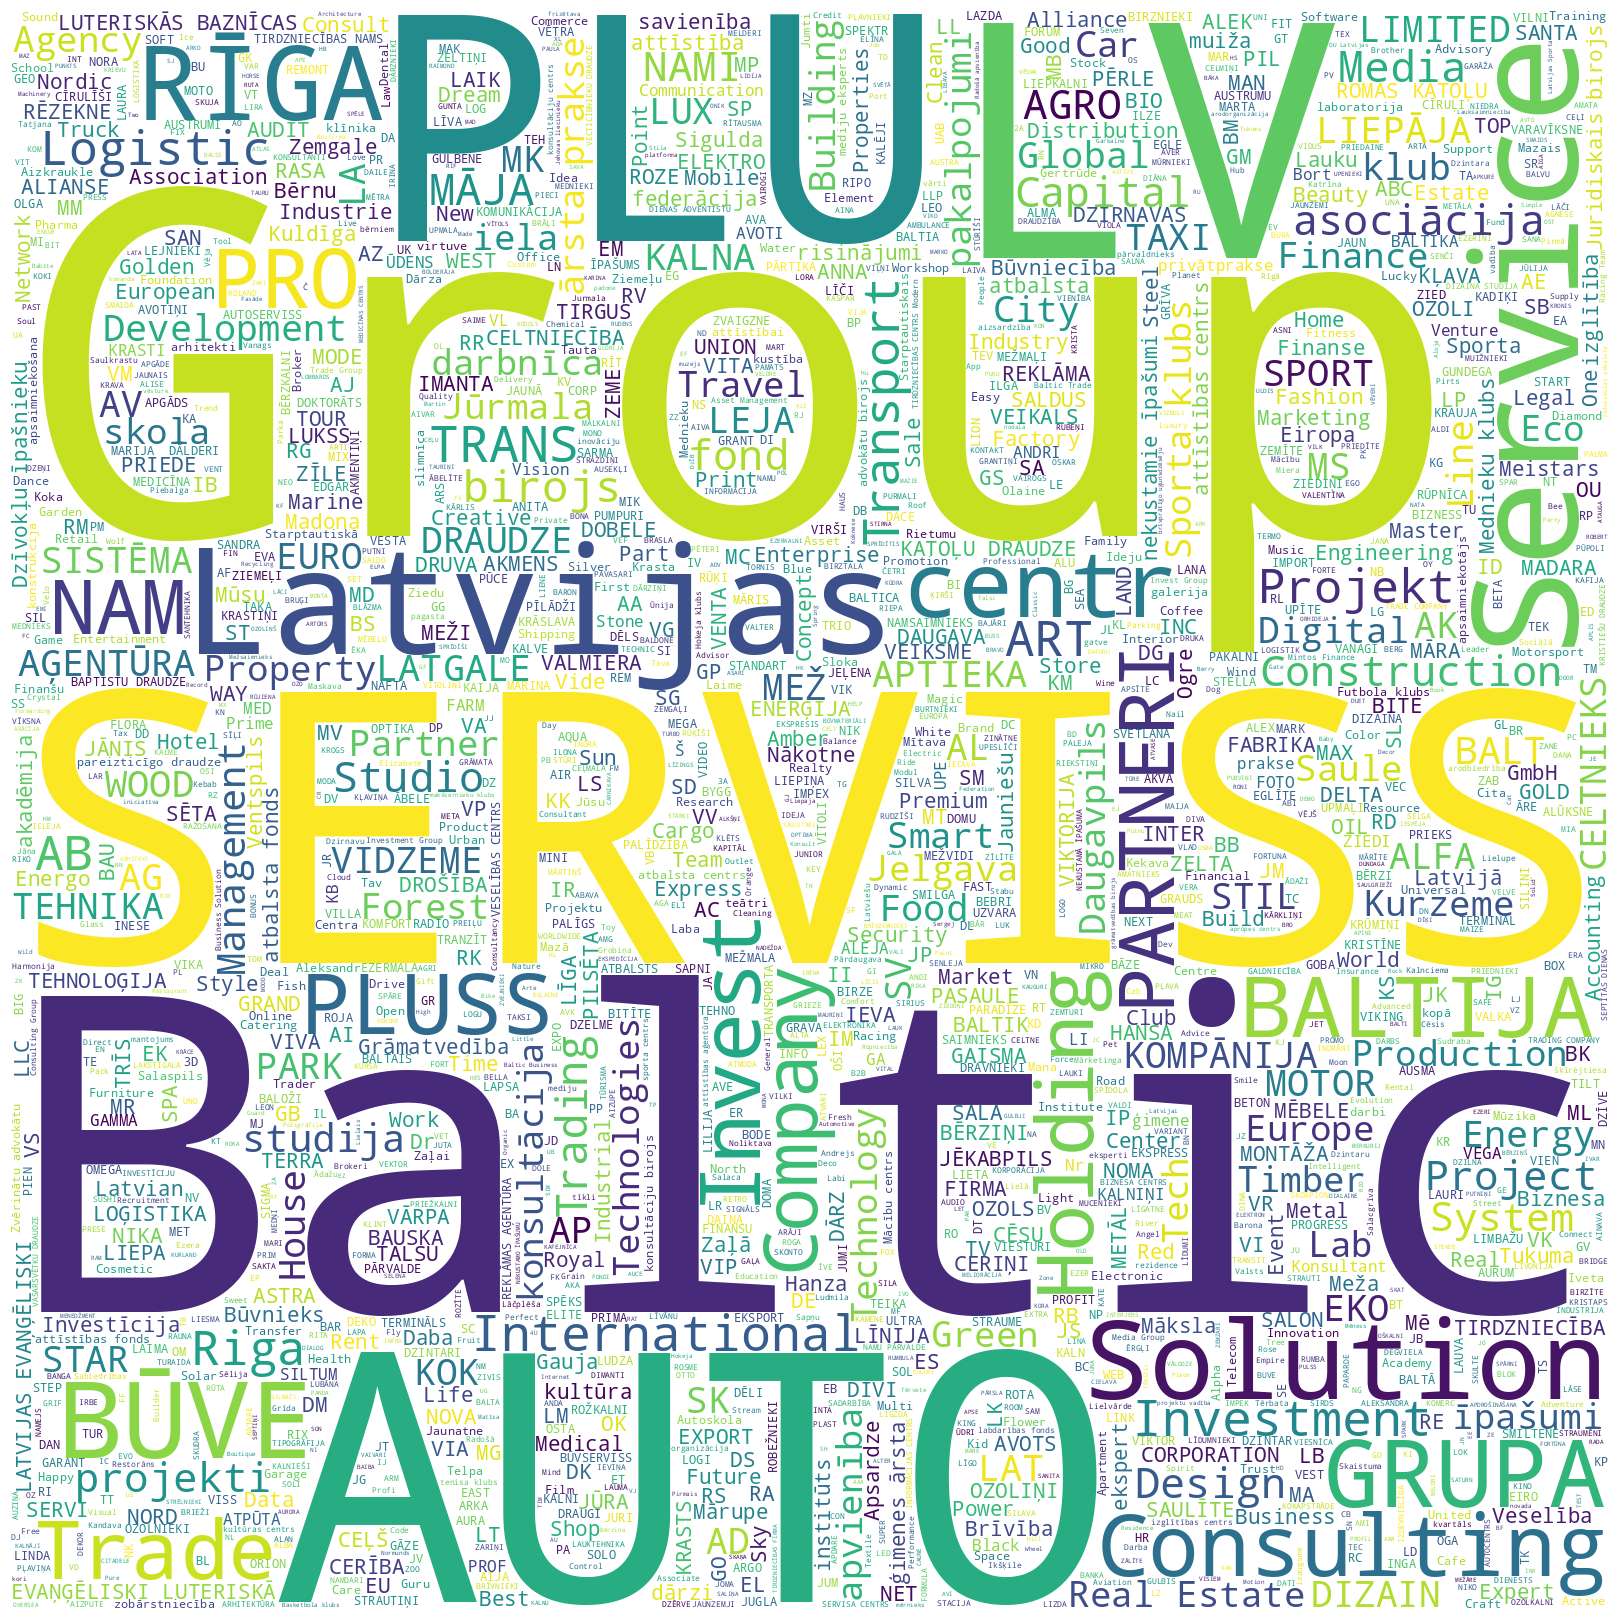

In [7]:
text = " ".join(name for name in df_data.name_in_quotes.dropna())
stopwords = set(STOPWORDS)

latvian_stopwords = {
    "un", "ar", "par", "pie", "sabiedrība", "ierobežotu", "atbildību",
    "akciju", "zemnieku", "saimniecība", "individuālais", "uzņēmums",
    "filiāle", "kooperatīvā", "kooperatīvs", "biedrība", "nodibinājums",
    "sia", "ik", "as", "zem", "zs", "paju", "sab", "ps", "fil", "co", "ko",
    "latvija", "latvia", "ltd"
}
stopwords.update(latvian_stopwords)
all_letters = set(string.ascii_lowercase)
stopwords.update(all_letters)
wordcloud = WordCloud(
    stopwords=stopwords,
    background_color="white",
    width=1600, # Set the width of the word cloud image
    height=1600, # Set the height
    max_words=2000,
    colormap='viridis'
)

wordcloud.generate(text)

plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 📊 **Basic Data EDA**

### **Total Registrations by Registry Type 1991-2024**

#### Key Observation for the Registry Type (regtype_text) Data

These numbers show the total count of entities within each of Latvia's official state registers. The distribution is dominated by three key types:

* **Komercreģistrs (Commercial Register)**: The largest group, representing the primary register for all modern for-profit businesses like LLCs and Individual Merchants.
* **Uzņēmumu reģistra žurnāls (Enterprise Register's Journal)**: The second largest, primarily holding legacy entities from the initial post-Soviet registration boom in the early 1990s.
* **Biedrību un nodibinājumu reģistrs (Register of Associations and Foundations)**: The third group, representing the country's non-profit and civil society sector.
Together, these three registers account for over 95% of all entries, reflecting a clear and specialized system.

#### **Bar Plot for Registry Type**

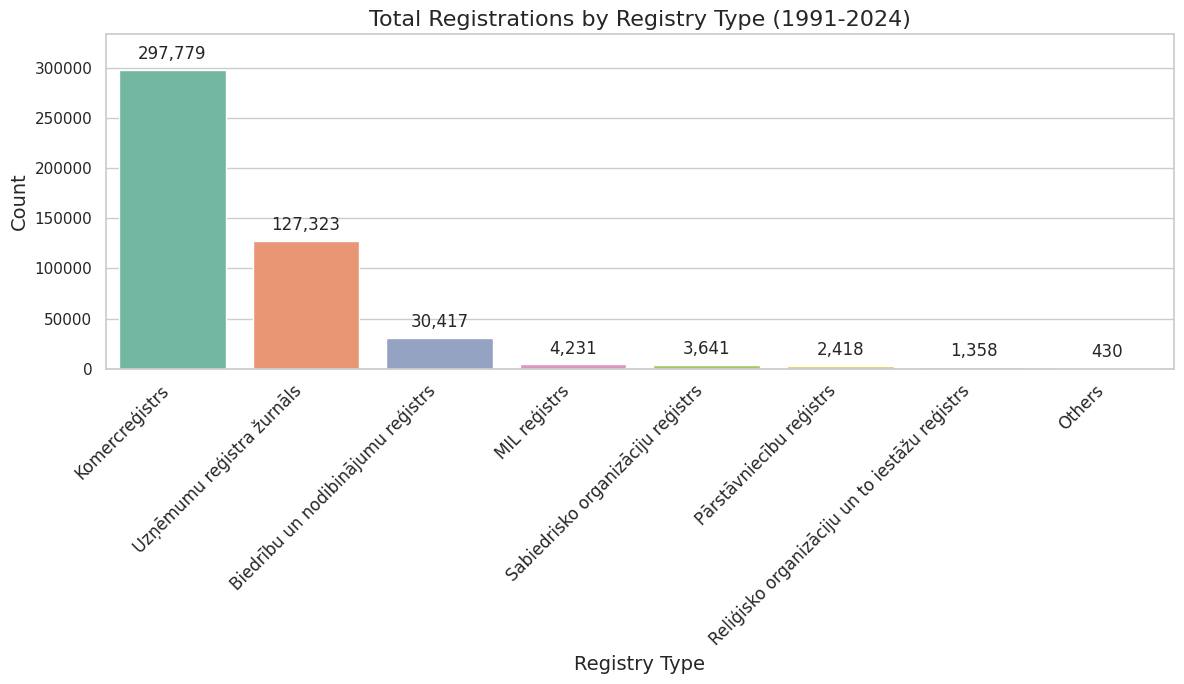

In [8]:
#Bar Plot for Registry Type
raw_regtype_counts = df_data['regtype_text'].value_counts()
threshold = 300
major_regtypes = raw_regtype_counts[raw_regtype_counts >= threshold]
others_sum_regtypes = raw_regtype_counts[raw_regtype_counts < threshold].sum()

if others_sum_regtypes > 0:
    others_series_regtypes = pd.Series([others_sum_regtypes], index=['Others'])
    plot_counts_series_regtypes = pd.concat([major_regtypes, others_series_regtypes])
else:
    plot_counts_series_regtypes = major_regtypes

regtype_counts_df_grouped = plot_counts_series_regtypes.reset_index()
regtype_counts_df_grouped.columns = ['Registry Type', 'Count']

regtype_counts_df_grouped = regtype_counts_df_grouped.sort_values('Count', ascending=False)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

num_categories = len(regtype_counts_df_grouped['Registry Type'])
palette = sns.color_palette("Set2", n_colors=num_categories if num_categories > 0 else 1)

ax = sns.barplot(
    x='Registry Type',
    y='Count',
    data=regtype_counts_df_grouped,
    palette=palette,
    order=regtype_counts_df_grouped['Registry Type'].tolist()
)

ax.set_title('Total Registrations by Registry Type (1991-2024)', fontsize=16)
ax.set_xlabel('Registry Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)

if not regtype_counts_df_grouped.empty:
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f"{int(height):,}",
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center',
                        va='bottom',
                        xytext=(0, 5),
                        textcoords='offset points',
                        fontsize=12)

if not regtype_counts_df_grouped.empty:
    current_max_y = regtype_counts_df_grouped['Count'].max()
    ax.set_ylim(0, current_max_y * 1.12 if current_max_y > 0 else 10)
else:
    ax.set_ylim(0,10)

plt.tight_layout()
plt.show()

#### **Donut Plot for Registry Type**

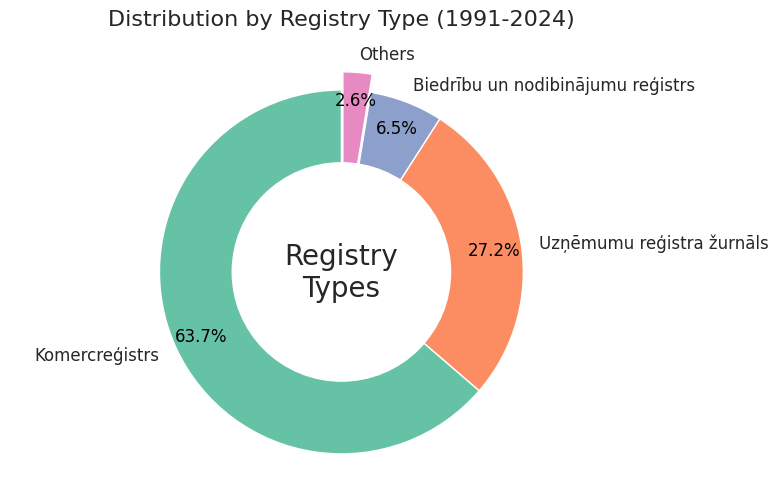

In [9]:
#
type_counts = df_data['regtype_text'].value_counts()
threshold = 5000
main_types = type_counts[type_counts >= threshold]
other_types_sum = type_counts[type_counts < threshold].sum()

if other_types_sum > 0:
    plot_data = pd.concat([main_types, pd.Series({'Others': other_types_sum})])
else:
    plot_data = main_types

num_categories = len(plot_data)
colors = sns.color_palette('Set2', num_categories)
explode = [0] * len(plot_data)
if 'Others' in plot_data.index:
    others_index = plot_data.index.get_loc('Others')
    explode[others_index] = 0.1

fig, ax = plt.subplots(figsize=(8, 5))
wedges, texts, autotexts = ax.pie(
    plot_data.values,
    labels=plot_data.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'white'}
)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)
for text in texts:
    text.set_fontsize(12)

centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')
ax.set_title('Distribution by Registry Type (1991-2024)', fontsize=16, pad=20)
ax.text(0, 0, 'Registry\nTypes', ha='center', va='center', fontsize=20)

plt.tight_layout()
plt.show()

### **Total Registrations by Company Type 1991-2024**

#### Key Observation for the Company  Type (type) Data:

These numbers show the total count for each specific legal form of a company or organization. The breakdown reveals:

* **Dominance of SIA**: The SIA (Limited Liability Company) is overwhelmingly the most common business structure in Latvia.
* **Historical Significance**: The next most common types tell a story of Latvia's history. This tier includes ZEM (historic farms from the 1992 land reform), BDR (non-profits), and the pair of IK (modern Individual Merchants) and IND (their obsolete predecessor).
* **Long Tail of Specialization**: The remaining 48 categories represent a long tail of highly specialized, rare, or historical legal forms that make up a very small fraction of the total.

#### **Bar Plot for Company Type**

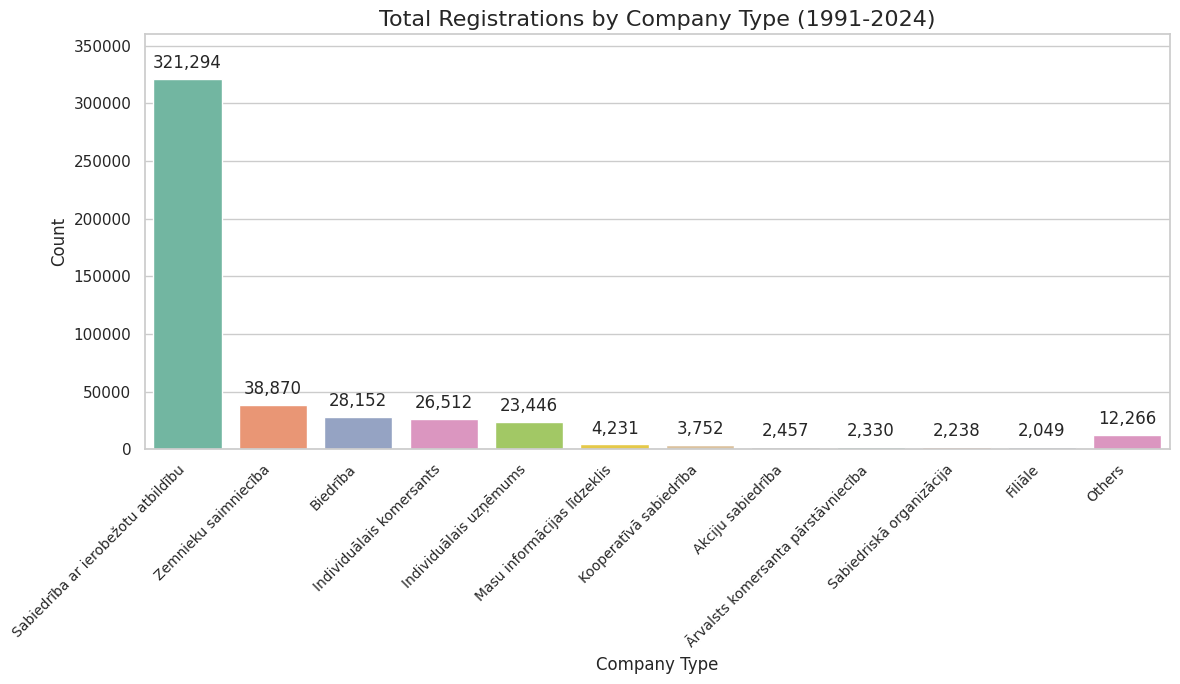

In [10]:
#Bar Plot for Company Type
type_counts = df_data['type_text'].value_counts()

threshold = 2000

major_types = type_counts[type_counts >= threshold]
others_sum = type_counts[type_counts < threshold].sum()

if others_sum > 0:
    others_series = pd.Series([others_sum], index=['Others'])
    plot_counts_series = pd.concat([major_types, others_series])
else:
    plot_counts_series = major_types

type_counts_df_grouped = plot_counts_series.reset_index()
type_counts_df_grouped.columns = ['Entity Type', 'Count']

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

num_categories = len(type_counts_df_grouped['Entity Type'])
palette = sns.color_palette("Set2", n_colors=num_categories if num_categories > 0 else 1)

ax = sns.barplot(
    x='Entity Type',
    y='Count',
    data=type_counts_df_grouped,
    palette=palette,
)

ax.set_title('Total Registrations by Company Type (1991-2024)', fontsize=16)
ax.set_xlabel('Company Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

if not type_counts_df_grouped.empty:
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f"{int(height):,}",
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center',
                        va='bottom',
                        xytext=(0, 5),
                        textcoords='offset points',
                        fontsize=12)

if not type_counts_df_grouped.empty:
    current_max_y = type_counts_df_grouped['Count'].max()
    ax.set_ylim(0, current_max_y * 1.12 if current_max_y > 0 else 10)
else:
    ax.set_ylim(0,10)

plt.tight_layout()
plt.show()

#### **Donut Plot for Company Type**

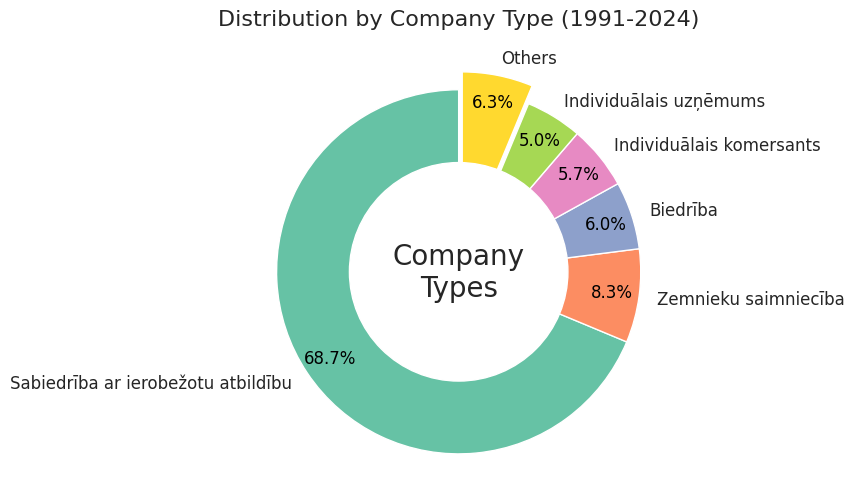

In [11]:
#Donut Plot for Company Type
type_counts = df_data['type_text'].value_counts()
threshold = 5000
main_types = type_counts[type_counts >= threshold]
other_types_sum = type_counts[type_counts < threshold].sum()

if other_types_sum > 0:
    plot_data = pd.concat([main_types, pd.Series({'Others': other_types_sum})])
else:
    plot_data = main_types

num_categories = len(plot_data)
colors = sns.color_palette('Set2', num_categories)
explode = [0] * len(plot_data)
if 'Others' in plot_data.index:
    others_index = plot_data.index.get_loc('Others')
    explode[others_index] = 0.1

fig, ax = plt.subplots(figsize=(8, 5))
wedges, texts, autotexts = ax.pie(
    plot_data.values,
    labels=plot_data.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'white'}
)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)
for text in texts:
    text.set_fontsize(12)

centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')
ax.set_title('Distribution by Company Type (1991-2024)', fontsize=16, pad=20)
ax.text(0, 0, 'Company\nTypes', ha='center', va='center', fontsize=20)
plt.tight_layout()
plt.show()

# 📊 **Visualizing 30 Years of Latvian Business Evolution**

## **The "Pioneer Era" - Annual Registrations Report (by Registry Type)**

### **Key Observations: A Three-Act Story**

This plot, by showing the data by the official Registry Type, it reveals a story not just about economic cycles, but about the fundamental evolution of Latvia's legal framework for businesses since 1991.

**Act 1: The "Wild East" Era (1991 - ~2002)**

* **Dominant Register**: Uzņēmumu reģistra žurnāls (The Enterprise Register's Journal)
* **The Story**: This original, all-purpose register captured the initial, explosive boom of post-Soviet business creation. The massive numbers you see here in the early 90s (especially the 35,000+ in 1992) include the land reform (ZEM), the first SIAs, and everything else. It was the "wild east" of enterprise.
* **The Trend**: After this initial boom, its usage plummets dramatically, becoming almost negligible by the early 2000s.

**Act 2: The "European Integration" Era (~2002 - Present)**

* **Dominant Register**: Komercreģistrs (The Commercial Register)
* **The Story**: The decline of the old register corresponds perfectly with the rise of the modern Komercreģistrs. This was not an accident; it was a major legal reform. The establishment of the Commercial Register was a key step in modernizing Latvia's business law and aligning it with European Union standards, in preparation for joining the EU in 2004.
* **The Trend**: From ~2002 onwards, this becomes the home for virtually all for-profit businesses (SIA, IK, etc.). Its trend line dictates the overall economic story we've seen before: the pre-crisis boom, the 2008 crash, and the 2011 rebound.

**Act 3: The Growth of Civil Society (~2005 - Present)**

* **Key Register**: Biedrību un nodibinājumu reģistrs (The Register of Associations and Foundations)
* **The Story**: This register for non-profits (NGOs) shows a distinct step-up in activity from 2005 onwards. This is likely linked to Latvia joining the EU in 2004, which opened up new European funding and opportunities for civil society organizations, leading to the creation of more associations and foundations.


Major types (>= 5000 registrations): ['Komercreģistrs', 'Uzņēmumu reģistra žurnāls', 'Biedrību un nodibinājumu reģistrs']


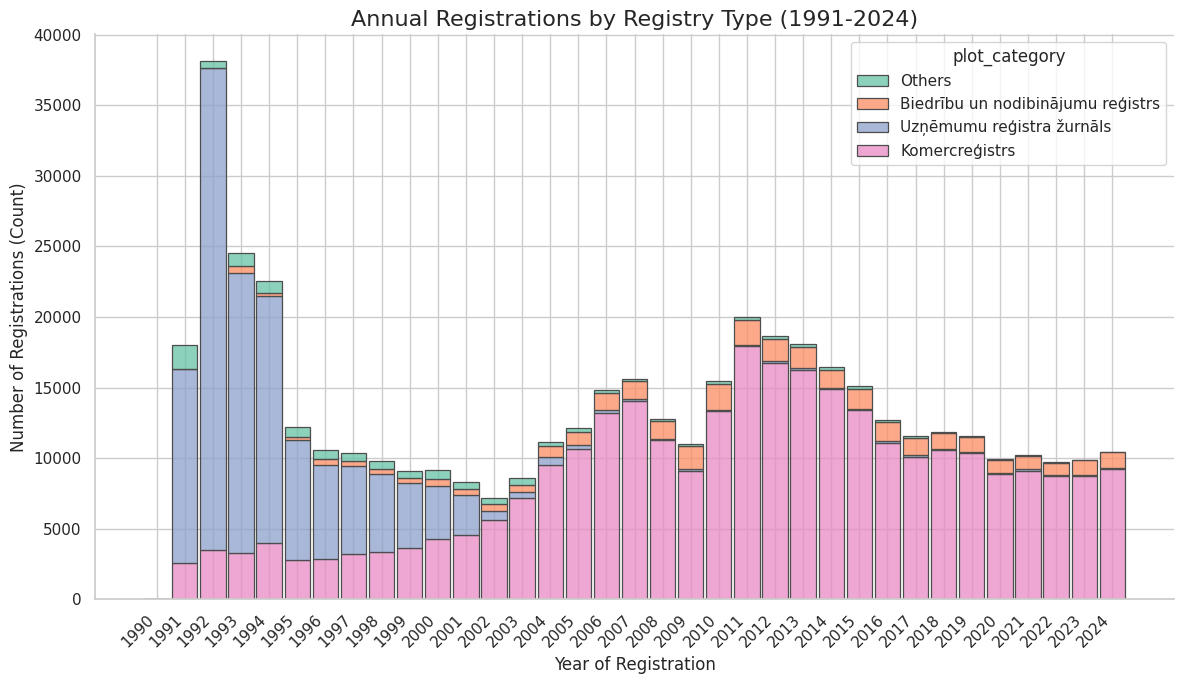

In [12]:
# Stacked histogram plot
sns.set_theme(style="whitegrid")

df_data = df_data.copy()
df_data['registered'] = pd.to_datetime(df_data['registered'], errors='coerce')
df_data.dropna(subset=['registered'], inplace=True)
df_data['year'] = df_data['registered'].dt.year.astype(int)
type_total_counts = df_data['regtype_text'].value_counts()

threshold = 5000
major_types_list = type_total_counts[type_total_counts >= threshold].index.tolist()
print(f"\nMajor types (>= {threshold} registrations): {major_types_list}")

df_data['plot_category'] = df_data['regtype_text'].apply(
    lambda x: x if x in major_types_list else 'Others'
)

plot_categories_unique = df_data['plot_category'].unique()
plot_category_counts = type_total_counts.loc[type_total_counts.index.isin(major_types_list)].copy()
if 'Others' in plot_categories_unique:
    others_sum = type_total_counts[~type_total_counts.index.isin(major_types_list)].sum()
    if others_sum > 0:
        plot_category_counts['Others'] = others_sum

hue_category_order = plot_category_counts.sort_values(ascending=True).index.tolist()

f, ax = plt.subplots(figsize=(12, 7))
sns.despine(f)
sns.histplot(
    data=df_data,
    x="year",
    hue="plot_category",
    hue_order=hue_category_order,
    multiple="stack",
    palette="Set2",
    edgecolor=".3",
    linewidth=.9,
    discrete=True,
    shrink=0.9
)

ax.set_xlabel("Year of Registration", fontsize=12)
ax.set_ylabel("Number of Registrations (Count)", fontsize=12)
ax.set_title("Annual Registrations by Registry Type (1991-2024)", fontsize=16)

unique_years = sorted(df_data['year'].unique())
if unique_years:
    ax.set_xticks(unique_years)
    ax.set_xticklabels([str(int(yr)) for yr in unique_years], rotation=45, ha='right')

plt.tight_layout()
plt.show()

## **The "Great Substitution" - Annual Registrations Report (by Entity Type)**

### **Key Observations: Business structures rise and fall**

This plot tells the entire 30-year story of Latvia's economic evolution, showing how different business structures rose and fell during distinct historical eras.

**The Pioneer Era (1991-1994)**: The Age of Farmers and Individual Enterprises
In the first years after independence, the business landscape was dominated by two simple forms:

* **ZEM (Farmer's Farm)**: The massive spike to 18,810 in 1992 is the single biggest event in this table, representing the one-time Land Reform that privatized agriculture.
* **IND (Individual Enterprise)**: This was the go-to entity for non-farming individual entrepreneurs in the early, less-regulated economy, with thousands of registrations per year.

During this time, the SIA (LLC) was present but had not yet become the dominant force.

**The Modernization Era (~1995-2004): The Rise of SIA and a Key Substitution**

This period marks a fundamental shift as Latvia modernized its legal framework, likely in preparation for joining the EU:

* **The Rise of SIA**: The SIA solidifies its position as the standard for formal commerce, consistently growing in popularity.
* **The IK Replaces the IND**: Around 2002, a crucial change happens. The IND as a business form virtually disappears, while the IK (Individual Merchant) appears and explodes in popularity. This was not a coincidence but a clear legal substitution, where the IK became the new, modern standard for sole proprietors.

**The "Boom, Bust & Beyond" Era (2005-Present): The SIA and IK Economy**

From 2005 onwards, the commercial landscape is primarily a two-entity system:

* **SIA and IK**: These two forms capture the economic cycles perfectly, peaking during the pre-2007 credit boom and crashing thereafter. The SIA remains the engine of the economy, while the IK's recent resurgence after 2021 points to a new trend in smaller-scale entrepreneurship.
* **BDR (Associations/Foundations)**: The steady presence of over 1,000 non-profit registrations per year since 2005 signals the development of a mature civil society, likely spurred by EU membership.


Major Entity Types (>= 5000 registrations): ['Sabiedrība ar ierobežotu atbildību', 'Zemnieku saimniecība', 'Biedrība', 'Individuālais komersants', 'Individuālais uzņēmums']


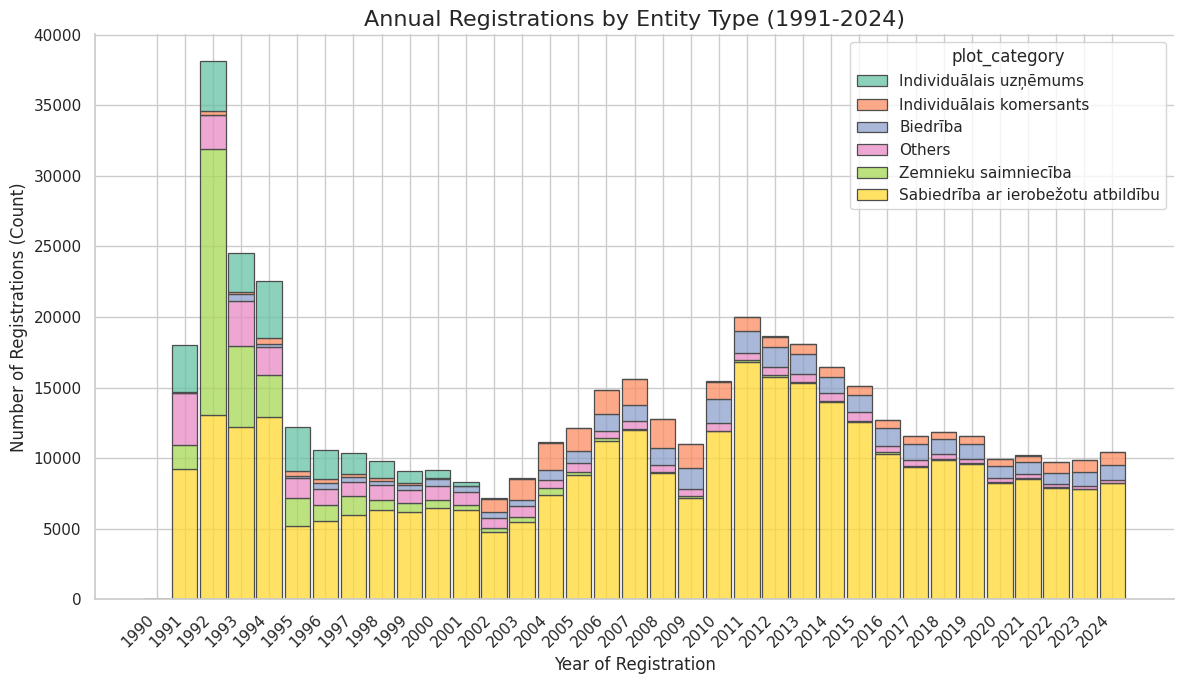

In [13]:
# Stacked histogram plot
sns.set_theme(style="whitegrid")

df_data_entity = df_data.copy()
df_data_entity['registered'] = pd.to_datetime(df_data_entity['registered'], errors='coerce')
df_data_entity.dropna(subset=['registered'], inplace=True)
df_data_entity['year'] = df_data_entity['registered'].dt.year.astype(int)
type_total_counts = df_data_entity['type_text'].value_counts()

threshold = 5000
major_types_list = type_total_counts[type_total_counts >= threshold].index.tolist()
print(f"\nMajor Entity Types (>= {threshold} registrations): {major_types_list}")

df_data_entity['plot_category'] = df_data_entity['type_text'].apply(
    lambda x: x if x in major_types_list else 'Others'
)

plot_categories_unique = df_data_entity['plot_category'].unique()

plot_category_counts = type_total_counts.loc[type_total_counts.index.isin(major_types_list)].copy()
if 'Others' in plot_categories_unique:
    others_sum = type_total_counts[~type_total_counts.index.isin(major_types_list)].sum()
    if others_sum > 0:
        plot_category_counts.loc['Others'] = others_sum

valid_categories_for_sorting = [cat for cat in plot_category_counts.index if cat in plot_categories_unique]
if valid_categories_for_sorting:
    hue_category_order = plot_category_counts.loc[valid_categories_for_sorting].sort_values(ascending=True).index.tolist()
else:
    hue_category_order = []

f, ax = plt.subplots(figsize=(12, 7))
sns.despine(f)

sns.histplot(
    data=df_data_entity,
    x="year",
    hue="plot_category",
    hue_order=hue_category_order,
    multiple="stack",
    palette="Set2",
    edgecolor=".3",
    linewidth=.9,
    discrete=True,
    shrink=0.9
)

ax.set_xlabel("Year of Registration", fontsize=12)
ax.set_ylabel("Number of Registrations (Count)", fontsize=12)
ax.set_title("Annual Registrations by Entity Type (1991-2024)", fontsize=16) # Updated title

unique_years = sorted(df_data_entity['year'].unique())
if unique_years:
    ax.set_xticks(unique_years)
    ax.set_xticklabels([str(int(yr)) for yr in unique_years], rotation=45, ha='right')

plt.tight_layout()
plt.show()

## **Two Crises, Two Stories: the 1998 Russian Crisis and the 2007 Global Financial Crisis. The Zombie Company Apocalypse**

### **Key Observations on Termination Spikes / The Zombie Company Apocalypse**

The data reveals three distinct periods with a high number of company terminations, each driven by different economic or regulatory events.

* **1998 Russian Financial Crisis**: The spike in terminations around 1998 was a direct result of Russia's economic collapse and ruble devaluation. Many Latvian companies with strong trade ties to Russia faced immediate insolvency as their partners defaulted and export markets vanished.

* **2007 Global Financial Crisis**: The sharp increase in terminations from 2007 was caused by the global financial crisis, which in Latvia manifested as the bursting of a real estate bubble and a severe banking crisis. This led to a deep recession, causing widespread business failures, particularly in the construction and finance sectors.

* **2016-2019 Regulatory Cleanup**: Unlike the previous spikes, the massive increase in terminations from 2016-2019 was not due to an economic crisis. It was a large-scale administrative "cleanup" by the Latvian Enterprise Register. Driven by international pressure to combat money laundering and improve financial transparency (¹), new laws were passed that empowered the Register to mass-liquidate thousands of dormant and non-compliant companies. The main triggers were failure to file annual reports or declare true beneficial owners (²). **On January 14, 2019, a record 6,647 companies were liquidated on a single day as part of this effort.**

* **Crackdown on Shell Companies**: The main goal was to eliminate inactive companies. New legislation gave the Register of Enterprises (Uzņēmumu reģistrs) the power to initiate a simplified liquidation process for companies that showed signs of being shell companies.

* **Failure to Disclose Beneficial Owners**: A crucial new requirement was that all companies had to declare their "true beneficial owners" (Patiesā Labuma Guvējs - PLG). Many companies, especially those with complex or deliberately obscured foreign ownership, failed to do this. The Register of Enterprises was then authorized to terminate them. This was a huge factor in the cleanup.

* **Inability to Contact the Company**: If a company did not submit its mandatory annual reports or could not be reached at its legally registered address, the Register could now unilaterally begin the liquidation process. This was a simple but highly effective way to identify and remove inactive entities.

* **Tax and Social Contribution Changes**: During this period, the government also reformed the "Micro-enterprise Tax" (Mikrouzņēmumu nodoklis) regime. The changes increased the tax and social security burden, making it financially unviable for many small or inactive businesses to continue existing, which prompted many owners to liquidate them voluntarily.

References:

1. MONEYVAL (2018), "Anti-money laundering and counter-terrorist financing measures - Latvia", Fifth Round Evaluation Report.
2. Lursoft IT (2019), "The Register of Enterprises of the Republic of Latvia has liquidated more than 6.6 thousand companies".

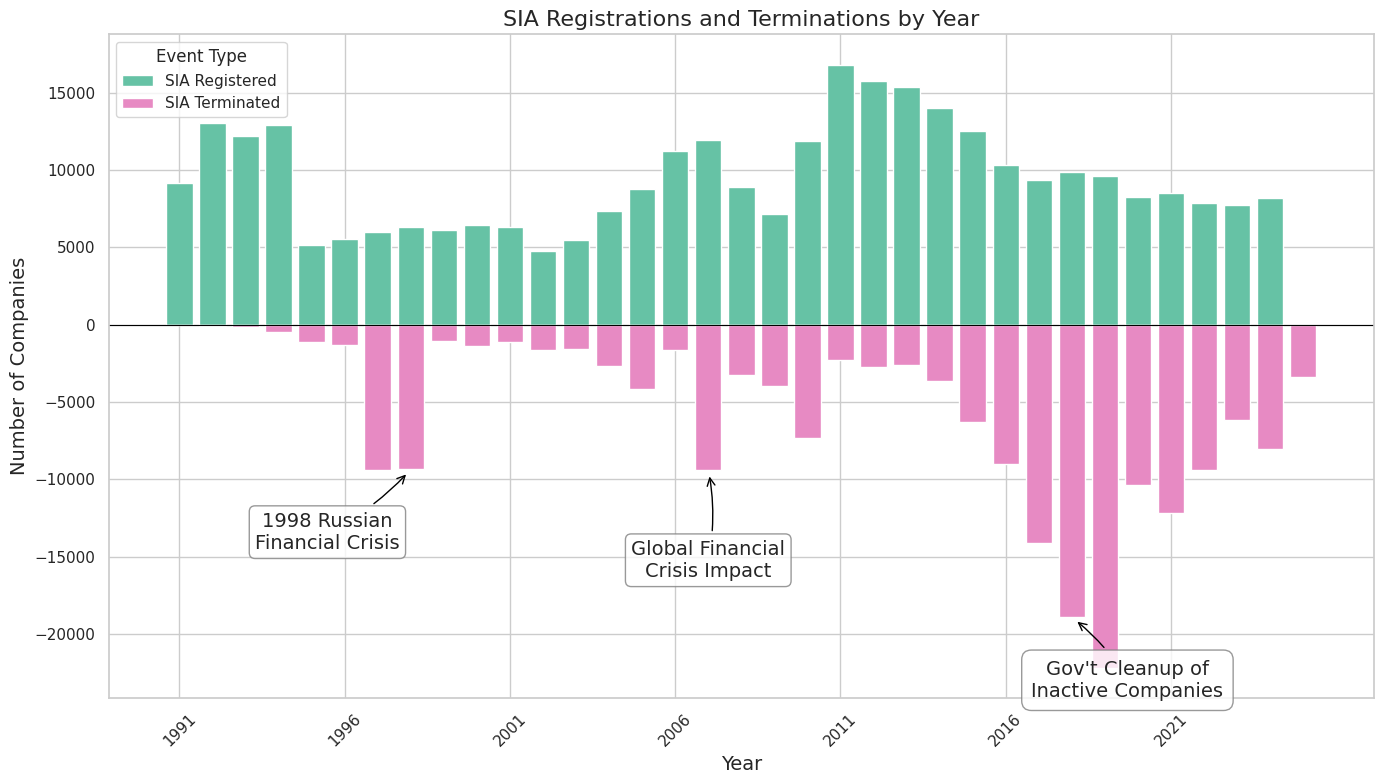

In [14]:
# Lifecycle plot
sns.set_theme(style="whitegrid")

df_sia_from_main = df_data[df_data['type'] == 'SIA'].copy()
df_sia_from_main['registered'] = pd.to_datetime(df_sia_from_main['registered'], errors='coerce')
df_sia_from_main['terminated'] = pd.to_datetime(df_sia_from_main['terminated'], errors='coerce')
df_sia_from_main['registered_year'] = df_sia_from_main['registered'].dt.year
df_sia_from_main['terminated_year'] = df_sia_from_main['terminated'].dt.year
df_sia_from_main.dropna(subset=['registered_year'], inplace=True)
df_sia_from_main['registered_year'] = df_sia_from_main['registered_year'].astype(int)
df_sia_from_main['terminated_year'] = df_sia_from_main['terminated_year'].astype('Int64')

registrations_by_year_sia = df_sia_from_main['registered_year'].value_counts().sort_index()
terminations_by_year_sia = -df_sia_from_main['terminated_year'].value_counts().sort_index()

all_years_sia = registrations_by_year_sia.index.union(
    terminations_by_year_sia.index[terminations_by_year_sia.index.notna()]
).astype(int).sort_values()

combined_data_sia = pd.DataFrame(index=all_years_sia)
combined_data_sia['registered_SIA'] = registrations_by_year_sia
combined_data_sia['terminated_SIA'] = terminations_by_year_sia
combined_data_sia = combined_data_sia.fillna(0)

annotation_y_values = {}
annotation_target_years = {
    '1998_crisis': 1998,
    '2007_crisis': 2007,
    '2018_cleanup': 2018
}

for key, year in annotation_target_years.items():
    if year in combined_data_sia.index:
        annotation_y_values[key] = combined_data_sia.loc[year, 'terminated_SIA']
    else:
        annotation_y_values[key] = 0

fig, ax = plt.subplots(figsize=(14, 8))

set3_palette = sns.color_palette("Set2",5)

ax.bar(combined_data_sia.index, combined_data_sia['registered_SIA'],
       label='SIA Registered', color=set3_palette[0], width=0.8) # Using the first color from Set3
ax.bar(combined_data_sia.index, combined_data_sia['terminated_SIA'],
       label='SIA Terminated', color=set3_palette[3], width=0.8) # Using the second color from Set3

ax.set_title('SIA Registrations and Terminations by Year', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of Companies', fontsize=14)
ax.legend(title='Event Type', loc='upper left')
ax.axhline(0, color='black', linewidth=0.8)

start_year, end_year = combined_data_sia.index.min(), combined_data_sia.index.max()
ax.set_xticks(np.arange(start_year, end_year + 1, 5))
ax.tick_params(axis='x', rotation=45)

arrowprops = dict(arrowstyle="->", connectionstyle="arc3,rad=.1", color='black', shrinkB=5)

if 1998 in combined_data_sia.index:
    ax.annotate(
        "1998 Russian\nFinancial Crisis",
        xy=(1998, annotation_y_values['1998_crisis']),
        xytext=(-60, -60), textcoords='offset points',
        ha='center', va='bottom',
        arrowprops=arrowprops,
        fontsize=14, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
    )
if 2007 in combined_data_sia.index:
    ax.annotate(
        "Global Financial\nCrisis Impact",
        xy=(2007, annotation_y_values['2007_crisis']),
        xytext=(0, -80), textcoords='offset points',
        ha='center', va='bottom',
        arrowprops=arrowprops,
        fontsize=14, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
    )
if 2018 in combined_data_sia.index:
    ax.annotate(
        "Gov't Cleanup of\nInactive Companies",
        xy=(2018, annotation_y_values['2018_cleanup']),
        xytext=(40, -60), textcoords='offset points',
        ha='center', va='bottom',
        arrowprops=arrowprops,
        fontsize=14, bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8)
    )

plt.tight_layout()
plt.show()

## **Comparing the Lifespan Statistics of Companies terminated during Two Major Crises**

### **Key Observations of Crisis Victims**

* **Victim Age Profile**: bold text The most striking difference is the age of the companies that failed. The victims of the 1998 crisis were young, with a median age of just 5.23 years. In contrast, the victims of the 2007 crisis were much older and more established, with a median age of 10.48 years.

* **The Nature of the Collapse**:

* **1998 - A "Generational Wipeout"**: The standard deviation (std) for the 1998 victims is extremely low (1.34 years). This means the failed companies were remarkably similar in age. The crisis acted like a "sniper," precisely targeting the cohort of businesses founded in the early 90s that were heavily reliant on trade with Russia. When that market collapsed, that specific generation was wiped out.
* **2008 - A Broad Economic Collapse**: The standard deviation for the 2007 victims is very high (4.54 years). This shows the crisis was an indiscriminate, "equal-opportunity destroyer." It wasn't just one type or age of company that failed; it was a broad collapse affecting businesses of all ages—from young companies born in the credit bubble to established firms that lost access to financing.

**In summary**: The data tells a compelling story. The 1998 crisis targeted a specific, vulnerable generation of post-Soviet businesses. The 2008 crisis was a much deeper, systemic failure that affected a far wider and more varied range of companies across the entire economy.

The density plot visualize this perfectly, likely showing a tall, narrow spike for the 1998 victims and a shorter, wider hill for the 2008 victims.

Found 13404 potential 1998 crisis victims with valid lifespan.
Found 20104 potential 2008 crisis victims with valid lifespan.


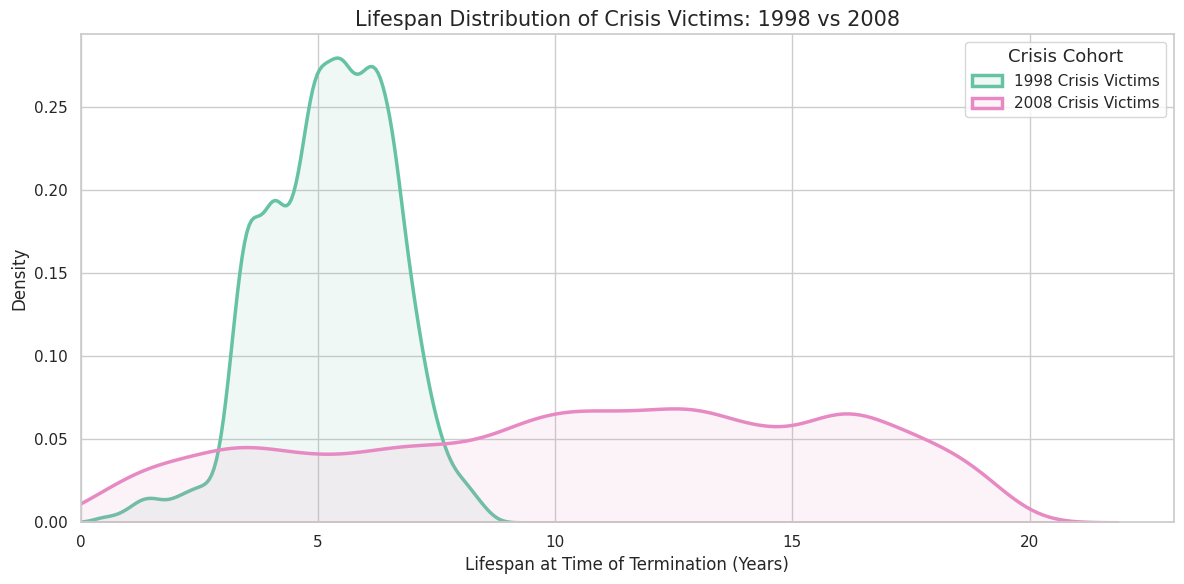

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Data Preparation ---
# (This section is assumed to have been run with your df_data)
# Ensure date columns are datetime objects
df_data['registered'] = pd.to_datetime(df_data['registered'], errors='coerce')
df_data['terminated'] = pd.to_datetime(df_data['terminated'], errors='coerce')

crisis_1998_start = '1998-01-01'
crisis_1998_end = '1999-12-31'

# The GFC impact was felt most in terminations from 2008 onwards
crisis_2008_start = '2008-01-01'
crisis_2008_end = '2010-12-31'

victims_1998_df = df_data[
    (df_data['terminated'] >= crisis_1998_start) &
    (df_data['terminated'] <= crisis_1998_end)
].copy()

victims_2008_df = df_data[
    (df_data['terminated'] >= crisis_2008_start) &
    (df_data['terminated'] <= crisis_2008_end)
].copy()

# Ensure we only calculate lifespans where both dates are valid
victims_1998_df.dropna(subset=['registered', 'terminated'], inplace=True)
victims_2008_df.dropna(subset=['registered', 'terminated'], inplace=True)

victims_1998_df['lifespan_days'] = (victims_1998_df['terminated'] - victims_1998_df['registered']).dt.days
victims_2008_df['lifespan_days'] = (victims_2008_df['terminated'] - victims_2008_df['registered']).dt.days

victims_1998 = victims_1998_df['lifespan_days'] / 365.25
victims_2008 = victims_2008_df['lifespan_days'] / 365.25

print(f"Found {len(victims_1998.dropna())} potential 1998 crisis victims with valid lifespan.")
print(f"Found {len(victims_2008.dropna())} potential 2008 crisis victims with valid lifespan.")

# --- 2. Create the Plot with "Set3" Colors ---
fig, ax = plt.subplots(figsize=(12, 6)) # Adjusted size slightly

# Define the color palette from Seaborn
set3_palette = sns.color_palette("Set2", 5)

# Plot for 1998 Crisis Victims
if not victims_1998.dropna().empty:
    sns.kdeplot(
        victims_1998.dropna(),
        label='1998 Crisis Victims',
        ax=ax,
        linewidth=2.5,
        color=set3_palette[0], # Using the first color from Set3
        fill=True, alpha=0.1   # Added fill for better visibility
    )
else:
    print("⚠️ No data for 1998 crisis victims to plot KDE.")

# Plot for 2008 Crisis Victims
if not victims_2008.dropna().empty:
    sns.kdeplot(
        victims_2008.dropna(),
        label='2008 Crisis Victims',
        ax=ax,
        linewidth=2.5,
        color=set3_palette[3], # Using the second color from Set3
        fill=True, alpha=0.1
    )
else:
    print("⚠️ No data for 2008 crisis victims to plot KDE.")

# --- 3. Customize the Plot ---
ax.set_title('Lifespan Distribution of Crisis Victims: 1998 vs 2008', fontsize=15)
ax.set_xlabel('Lifespan at Time of Termination (Years)', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_xlim(0) # Ensure x-axis starts at 0

if not victims_1998.dropna().empty or not victims_2008.dropna().empty:
    ax.legend(title='Crisis Cohort', title_fontsize='13', fontsize='11', frameon=True)
else:
    print("⚠️ No data plotted, legend will be empty.")

plt.tight_layout()
plt.show()

# 📊 **The Health of the Ecosystem and Micro-Patterns**

## **Distribution of Company Lifespans in Latvia**

### Key Takeaways

This report provides robust insights into the lifecycle of Latvian companies.

* **The Median Lifespan is 8.19 Years**: This remains the most crucial figure. It means half of all companies that eventually close do so before reaching this age, while the other half last longer. This median value is a more accurate measure of a "typical" company's lifespan than the average because it's less affected by outliers.

* **The Mean is Higher Than the Median (9.65 vs 8.19)**: This difference still indicates a right-skewed distribution. A smaller number of very successful, long-lasting companies are pulling the average (mean) lifespan up. The histogram generated will clearly show this, with a large cluster of companies on the left side (shorter lifespans) and a long "tail" extending to the right.

* **The First ~5 Years are Critical**: The 25th percentile at 4.89 years shows that a full quarter of all terminated companies fail before they even reach approximately 4.9 years of age. This continues to highlight the significant risk involved in the early stages of a business.

* **A Resilient Quarter**: On the other hand, the 75th percentile at 12.89 years indicates that 25% of companies survive for nearly 13 years, demonstrating a solid level of resilience for those that become established.

In short, the data consistently shows a landscape of high early-stage risk, with a typical lifespan of about 8.2 years, but also with a significant portion of businesses demonstrating long-term durability. The increased sample size further strengthens these conclusions.


☑️ --- Lifespan Analysis Report ---
✔️ Total companies with positive lifespans analyzed: 258031

✔️ Summary statistics for company lifespan (in years):
count    258031.00
mean          9.65
std           6.38
min           0.00
25%           4.89
50%           8.19
75%          12.90
max          34.26
Name: lifespan_years, dtype: float64
✔️ Median Lifespan: 8.19 years
-------------------------------------



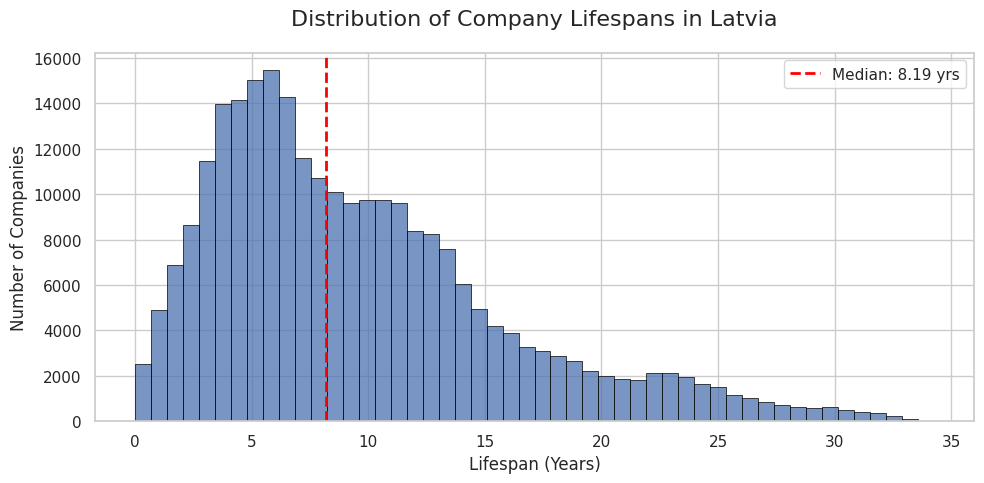

In [16]:
# Lifespan histogram
sns.set_theme(style="whitegrid")

df_analysis = df_data.copy()
df_analysis['registered'] = pd.to_datetime(df_analysis['registered'], errors='coerce')
df_analysis['terminated'] = pd.to_datetime(df_analysis['terminated'], errors='coerce')
df_terminated_updated = df_analysis.dropna(subset=['terminated']).copy()
df_terminated_updated.dropna(subset=['registered', 'terminated'], inplace=True)
df_terminated_updated['lifespan_years'] = \
    (df_terminated_updated['terminated'] - df_terminated_updated['registered']).dt.days / 365.25
df_terminated_updated.dropna(subset=['lifespan_years'], inplace=True)
df_terminated_updated = df_terminated_updated[df_terminated_updated['lifespan_years'] > 0]

median_lifespan_value = np.nan
if not df_terminated_updated.empty:
    print("\n☑️ --- Lifespan Analysis Report ---")
    print(f"✔️ Total companies with positive lifespans analyzed: {len(df_terminated_updated)}")
    print("\n✔️ Summary statistics for company lifespan (in years):")
    description = df_terminated_updated['lifespan_years'].describe().round(2)
    print(description)
    median_lifespan_value = description['50%'] # Get median from describe output
    print(f"✔️ Median Lifespan: {median_lifespan_value:.2f} years")
    print("-------------------------------------\n")
else:
    print("\n⚠️ No valid lifespan data available for numerical report after filtering.")

fig, ax = plt.subplots(figsize=(10, 5))
if not df_terminated_updated.empty:
    sns.histplot(
        data=df_terminated_updated,
        x='lifespan_years',
        bins=50,
        ax=ax,
        palette="Set2",
        edgecolor='black',
        linewidth=0.5
    )

    if pd.notna(median_lifespan_value):
        ax.axvline(
            median_lifespan_value,
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'Median: {median_lifespan_value:.2f} yrs'
        )

    ax.set_title('Distribution of Company Lifespans in Latvia', fontsize=16, pad=20)
    ax.set_xlabel('Lifespan (Years)', fontsize=12)
    ax.set_ylabel('Number of Companies', fontsize=12)
    if pd.notna(median_lifespan_value):
        ax.legend()
else:
    ax.set_title('Distribution of Company Lifespans in Latvia', fontsize=16, pad=20)
    ax.set_xlabel('Lifespan (Years)', fontsize=12)
    ax.set_ylabel('Number of Companies', fontsize=12)
    ax.text(0.5, 0.5, "No lifespan data available to plot.",
            horizontalalignment='center', verticalalignment='center',
            transform=ax.transAxes, fontsize=12)
    print("⚠️ No valid lifespan data available to plot histogram.")
plt.tight_layout()
plt.show()

## **Company Lifespan by Major Entity Type**

### **Key Insights on Company Lifespan by Type**

**Top Performers in Durability:**

* **ZEM (Farmer's Farms)**: Stands out significantly, with a median lifespan of 18.32 years. This reinforces that this entity type, often tied to land and multi-generational operations, is by far the most durable.
* **AS (Joint Stock Companies)**: These also show strong longevity, with a median of 11.77 years. This is expected, as establishing an AS typically requires more significant capital and structure, implying a longer-term commitment.
* **IND (Individual Enterprises)**: The legacy form for individual entrepreneurs boasts a respectable median lifespan of 11.62 years, likely reflecting businesses started in the early 90s that persisted for a considerable time.

**Mid-Tier Durability:**

* **SAB (Partnerships)**, **KB (Limited Partnerships)**, **BDR (Associations/Foundations)**, **FIL (Branches of Foreign Merchants)**: These entity types cluster in the 8.2 to 9.1 year median lifespan range.
* **SIA (LLCs)**: As the most common business type, the SIA falls squarely into this category with a median lifespan of 7.72 years, suggesting a common operational lifecycle for standard business structures.

**Lower Durability:**

* **PSV (Self-Employed Persons)**, **PAR (Representative Offices)**, **VU (State/Municipal Enterprises)**, **IK (Individual Merchants)**: These types show the shortest median lifespans among the major categories, ranging from 6.00 to 7.19 years. The IK, as the modern replacement for IND, having a significantly shorter median lifespan is a noteworthy point, potentially reflecting a more dynamic but also more volatile environment for current individual entrepreneurs. VU entities often have specific, sometimes temporary, mandates or are subject to restructuring, which could explain their shorter median lifespan.

Overall: The data paints a picture where agricultural businesses (ZEM) and more capital-intensive structures (AS) are built for the long haul. Standard commercial operations and non-profits have a solid mid-range lifespan, while various forms of individual or specialized entities tend to have shorter operational lives. The difference between the mean and 50% (median) for most types is modest, indicating relatively symmetrical distributions of lifespan. The exceptions are IND (mean 13.15 vs. median 11.62) and KB (mean 11.38 vs. median 8.84), where the higher mean suggests a number of very long-lived outliers in those categories.


✔️ Selected top entity types from 'type' (count >= 1000): ['SIA', 'ZEM', 'IK', 'IND', 'BDR', 'PAR', 'KB', 'SAB', 'FIL', 'AS', 'VU', 'PSV']
✔️ Statistical summary for entity types from 'type' with at least 1000 terminated companies:

         count   mean   std   min    25%    50%    75%    max
type                                                         
ZEM    15268.0  17.48  7.80  0.03  11.21  18.32  23.52  33.76
AS      1633.0  12.12  6.42  0.04   7.44  11.77  15.13  33.87
IND    13410.0  13.15  8.34  0.00   6.35  11.62  19.92  34.26
SAB     2238.0   9.69  4.65  0.17   6.12   9.06  13.02  25.35
KB      2322.0  11.40  8.00  0.04   6.30   8.85  15.22  32.98
BDR     2877.0   9.81  5.96  0.35   5.10   8.77  13.38  32.82
FIL     1915.0   9.23  5.83  0.02   4.90   8.22  12.64  31.23
SIA   192466.0   9.01  5.58  0.00   4.83   7.73  12.06  34.21
PSV     1109.0   7.65  4.21  0.01   4.04   7.19  10.60  23.61
PAR     2350.0   7.64  4.88  0.03   4.20   6.72  10.58  29.52
VU      1152.0   6.78 

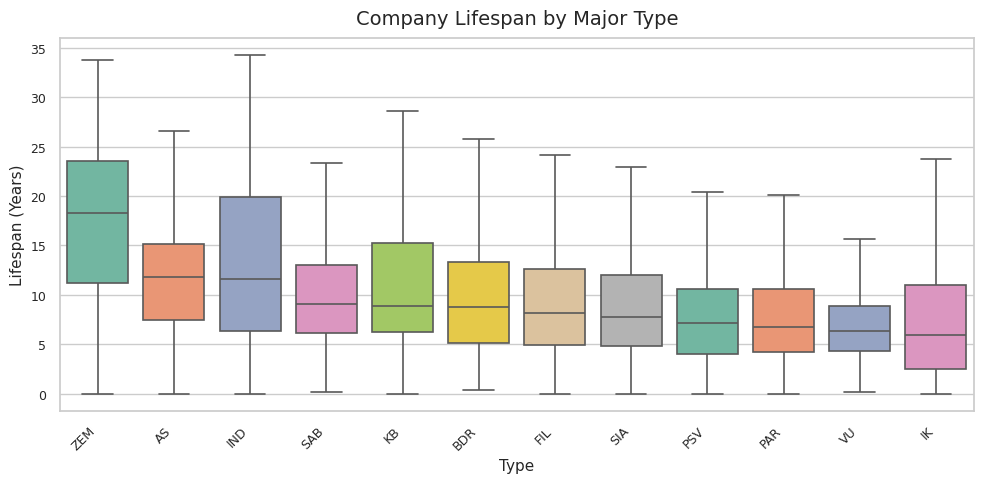

In [17]:
# Lifespan by Major Entity Type box plot
sns.set_theme(style="whitegrid")

df_data_copy = df_data.copy()
df_data_copy['registered'] = pd.to_datetime(df_data_copy['registered'], errors='coerce')
df_data_copy['terminated'] = pd.to_datetime(df_data_copy['terminated'], errors='coerce')
df_terminated_updated = df_data_copy.dropna(subset=['terminated']).copy()
df_terminated_updated.dropna(subset=['registered', 'terminated'], inplace=True)
df_terminated_updated['lifespan_years'] = \
    (df_terminated_updated['terminated'] - df_terminated_updated['registered']).dt.days / 365.25
df_terminated_updated.dropna(subset=['lifespan_years'], inplace=True)
df_terminated_updated = df_terminated_updated[df_terminated_updated['lifespan_years'] > 0]

entity_type_column_for_boxplot = 'type'

if entity_type_column_for_boxplot in df_terminated_updated.columns:
    df_terminated_updated[entity_type_column_for_boxplot] = df_terminated_updated[entity_type_column_for_boxplot].astype(str)
    df_terminated_updated[entity_type_column_for_boxplot] = df_terminated_updated[entity_type_column_for_boxplot].str.strip()
    df_terminated_updated[entity_type_column_for_boxplot].replace('', 'Unknown', inplace=True)
else:
    print(f"⚠️ Warning: Column '{entity_type_column_for_boxplot}' not found in df_terminated_updated! Please check your DataFrame.")

min_count_for_plot = 1000
type_counts_terminated = df_terminated_updated[entity_type_column_for_boxplot].value_counts()
top_types = type_counts_terminated[type_counts_terminated >= min_count_for_plot].index.tolist()
df_plot_box = df_terminated_updated[df_terminated_updated[entity_type_column_for_boxplot].isin(top_types)].copy()

print(f"\n✔️ Selected top entity types from '{entity_type_column_for_boxplot}' (count >= {min_count_for_plot}): {top_types}")

print(f"✔️ Statistical summary for entity types from '{entity_type_column_for_boxplot}' with at least {min_count_for_plot} terminated companies:\n")

if df_plot_box.empty:
    print(f"No entity types from '{entity_type_column_for_boxplot}' meet the criteria for the report.")
else:
    lifespan_by_type_report = df_plot_box.groupby(entity_type_column_for_boxplot)['lifespan_years'].describe().round(2)
    ordered_types_report = lifespan_by_type_report.loc[
        lifespan_by_type_report['50%'].sort_values(ascending=False).index
    ]
    print(ordered_types_report.to_string())
print("-------------------------------------------------------------\n")

if df_plot_box.empty:
    print(f"Cannot generate plot as no entity types from '{entity_type_column_for_boxplot}' meet the criteria.")
    fig, ax = plt.subplots(figsize=(10, 5.5))
    ax.text(0.5, 0.5, "No data to display for box plot.",
            horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.set_title(f'Company Lifespan by Major {entity_type_column_for_boxplot.replace("_"," ").title()}', fontsize=14)
    plt.show()
else:
    median_lifespans = df_plot_box.groupby(entity_type_column_for_boxplot)['lifespan_years'].median()
    ordered_types_for_plot = median_lifespans.sort_values(ascending=False).index.tolist()

    fig, ax = plt.subplots(figsize=(10, 5))
    sns.boxplot(
        data=df_plot_box,
        x=entity_type_column_for_boxplot,
        y='lifespan_years',
        order=ordered_types_for_plot,
        palette="Set2",
        showfliers=False,
        ax=ax,
        linewidth=1.2
    )

    title_text = f'Company Lifespan by Major {entity_type_column_for_boxplot.replace("_"," ").title()}'
    ax.set_title(title_text, fontsize=14, pad=10)
    ax.set_xlabel(entity_type_column_for_boxplot.replace("_"," ").title(), fontsize=11)
    ax.set_ylabel('Lifespan (Years)', fontsize=11)

    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(fontsize=9)
    plt.tight_layout()
    plt.show()

## **Median Age of Active Companies in Latvia**

* The Aging of the Business Population. The Question: Is the average Latvian company getting older or younger? A rising average age might suggest a stable, mature economy, but potentially less innovation. A falling average age could signal an entrepreneurial boom.

### Key Observations for Median Age

The median age of Latvian companies has gone through three distinct and fascinating phases.

**1. The "Growing Up" Phase (1991-2007)**
From 1991 to 2006, the median age of active companies increased relentlessly, from near zero to a peak of 9 years. This represents the natural aging process of a new economy. Latvia was building its entire stock of businesses from scratch, and as this first large generation of companies grew older together, the median age of the whole population naturally rose with them.

**2. The Crisis-Driven "Rejuvenation" (2007-2011)**
This is the most interesting part of the timeline. The trend dramatically reverses, and the business population gets younger, with the median age dropping from 9.0 years in 2006 to a low of 7.6 years in 2011.

This "rejuvenation" was caused by a powerful two-punch combination from the 2008 financial crisis:

* Massive Terminations of Older Firms: The crisis forced a huge number of mature, 10-15-year-old companies into bankruptcy. Removing a large number of companies that are older than the median pulls the median age down.
* Influx of "Boom-Era" Companies: The years leading up to the crisis (2005-2007) saw a huge boom in new registrations. These "newborn" companies also pulled the median age down.
The creative destruction of the crisis effectively made the entire business population younger.

**3. The "Second Aging" into Maturity (2011-Present)**
From the low point in 2011, the median age begins a new, steady climb, reaching an all-time high of 13 years in 2024. This is driven by a slowdown in the "birth rate" of new companies. With fewer new startups being created each year compared to the past, the relentless aging of the massive stock of surviving companies has become the dominant force, pushing the median age higher every year.

**Conclusion: **This data beautifully illustrates the entire life cycle of a modern economy. We can see the initial rapid growth, the transformative shock of a major crisis that made the business population younger, and now, a steady aging process into a more mature, established, and less dynamic phase.

Analyzing years from 1990 to 2024...


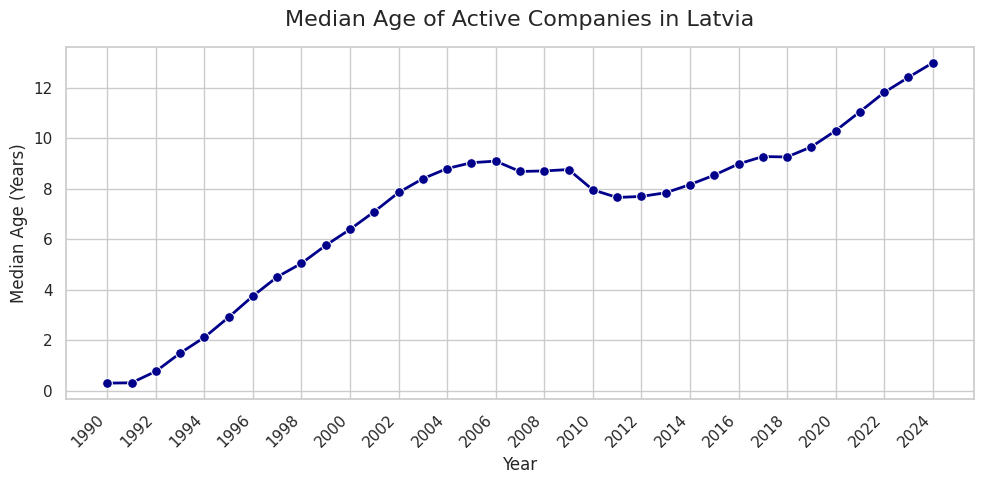

In [18]:
# Median Age of Active Companies in Latvia line plot
sns.set_theme(style="whitegrid")

df_analysis_copy = df_data.copy()
df_analysis_copy['registered'] = pd.to_datetime(df_analysis_copy['registered'], errors='coerce')
df_analysis_copy['terminated'] = pd.to_datetime(df_analysis_copy['terminated'], errors='coerce')
df_median_age_analysis = df_analysis_copy.dropna(subset=['registered']).copy()

if df_median_age_analysis.empty:
    print("No data available after initial preparation (df_median_age_analysis is empty). Cannot proceed.")
    age_df = pd.DataFrame(columns=['year', 'median_age'])
else:
    min_year_series = df_median_age_analysis['registered'].dt.year
    if min_year_series.empty:
        print("No 'registered' dates found to determine year range. Cannot proceed.")
        age_df = pd.DataFrame(columns=['year', 'median_age'])
    else:
        min_year = min_year_series.min()
        max_year = min_year_series.max()
        if pd.isna(min_year) or pd.isna(max_year):
            print("Could not determine valid year range from 'registered' dates. Cannot proceed.")
            age_df = pd.DataFrame(columns=['year', 'median_age'])
        else:
            years_to_analyze = range(int(min_year), int(max_year) + 1)
            median_ages = []
            print(f"Analyzing years from {int(min_year)} to {int(max_year)}...")
            for year_val in years_to_analyze:
                current_date_loop = pd.to_datetime(f"{year_val}-12-31")
                active_df_loop = df_median_age_analysis[
                    (df_median_age_analysis['registered'] <= current_date_loop) &
                    (
                        (df_median_age_analysis['terminated'].isna()) |
                        (df_median_age_analysis['terminated'] > current_date_loop)
                    )
                ]
                if active_df_loop.empty:
                    median_ages.append({'year': year_val, 'median_age': float('nan')})
                    continue
                ages = (current_date_loop - active_df_loop['registered']).dt.days / 365.25
                ages = ages[ages > 0]
                if ages.empty:
                    median_ages.append({'year': year_val, 'median_age': float('nan')})
                else:
                    median_age = ages.median()
                    median_ages.append({'year': year_val, 'median_age': median_age})
            age_df = pd.DataFrame(median_ages)
            age_df.dropna(subset=['median_age'], inplace=True) # Remove years where median couldn't be calculated

fig, ax = plt.subplots(figsize=(10, 5))
if not age_df.empty:
    sns.lineplot(
        data=age_df,
        x='year',
        y='median_age',
        ax=ax,
        color='darkblue',
        marker='o',
        markersize=7,
        linewidth=2
    )

    ax.set_title('Median Age of Active Companies in Latvia', fontsize=16, pad=15)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Median Age (Years)', fontsize=12)

    if len(age_df['year']) > 1:
        start_yr = int(age_df['year'].min())
        end_yr = int(age_df['year'].max())
        tick_step = max(1, (end_yr - start_yr) // 15)
        ax.set_xticks(range(start_yr, end_yr + 1, tick_step))
        plt.xticks(rotation=45, ha='right')

else:
    # Handle case where there's no data to plot
    ax.set_title('Median Age of Active Companies in Latvia', fontsize=16, pad=15)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Median Age (Years)', fontsize=12)
    ax.text(0.5, 0.5, "No data available to generate the plot.",
            horizontalalignment='center', verticalalignment='center',
            transform=ax.transAxes, fontsize=12)
    print("⚠️ No data available to generate the plot (age_df is empty).")

plt.tight_layout()
plt.show()

## **Company Survival Rate by Registration Cohort**

* How have survival rates changed over time? The Question: Do companies started in certain eras have a better chance of long-term survival? For example, did companies created in the optimistic "boom years" of 2005-2007 fare better or worse than those created in the stable 2010s?

### **Key Observations from the Cohort Survival Rates:**

**1. The "Resilient Pioneers" (1995 Cohort):**

* Companies started in 1995 demonstrate the highest overall long-term survival rates.
* A remarkable 91.7% survived their first 5 years, and 77.6% made it to the 10-year mark. Even after 20 years, nearly half (48.3%) were still active.
* This cohort benefited from being established after the initial post-Soviet turbulence but before the full impact of the 1998 crisis and later global shocks affected their most vulnerable early years.

**2. The "Millennium" Cohort (2000): Strong Start, Crisis Impacted:**

* This cohort had the highest 1-year survival rate (99.5%), suggesting a very stable start.
* However, their 10-year survival rate (62.1%) is significantly lower than the 1995 cohort. These companies were around 8-9 years old when the 2008 global financial crisis hit, which clearly took a toll on their medium-term survival.

**3. The "Pre-Crisis Boom" Cohort (2005): Surprisingly Robust Early On:**

* Despite being registered just before the 2008 crisis, this cohort shows strong early-to-mid-term survival, with 90.2% making it to 5 years and an impressive 76.5% reaching 10 years (almost matching the 1995 cohort).
* This suggests that many companies started in this boom period were either resilient enough or perhaps benefited from post-crisis support or opportunities that allowed them to navigate their youth through the crisis. However, their 15-year survival (43.6%) shows a significant drop, indicating challenges later in their lifecycle.

**4. The "Post-Crisis Recovery/Austerity" Cohort (2010): Growing in Tough Times:**

* This cohort started in a period of economic recovery but also austerity.
* Their 5-year survival (88.8%) is good, but their 10-year survival (54.8%) is notably lower than the 1995 and 2005 cohorts, suggesting that the difficult economic conditions of the early 2010s impacted their long-term viability.

**5. The "New Normal" Cohort (2015): Facing the Toughest Odds So Far:**

* This cohort shows the lowest survival rates at every milestone compared to the others: 97.4% at 1 year, only 70.2% at 5 years, and 48.6% at 10 years.
* These companies faced an increasingly competitive environment, the impact of the 2016-2019 regulatory cleanup (which might have removed struggling young firms more quickly), and the onset of the COVID-19 pandemic around their 5th year. This aligns with our earlier finding of rising "infant mortality" in recent years.

**In Summary:** The data illustrates that the era a company is "born" into significantly shapes its destiny. The early-to-mid 90s offered a window for high long-term survival, while companies started in the last decade appear to face a much more challenging path to reach the 10-year mark.

Cohorts to analyze: [1995, 2000, 2005, 2010, 2015]

--- Cohort Survival Rate Report (%) ---
cohort_label  1995 Cohort  2000 Cohort 2005 Cohort 2010 Cohort 2015 Cohort
years_after                                                               
1                    98.2         99.5        98.7        98.6        97.4
5                    91.7         88.8        90.2        88.8        70.2
10                   77.6         62.1        76.5        54.8           -
15                   55.7         53.8        43.6           -           -
20                   48.3         36.1           -           -           -
-------------------------------------



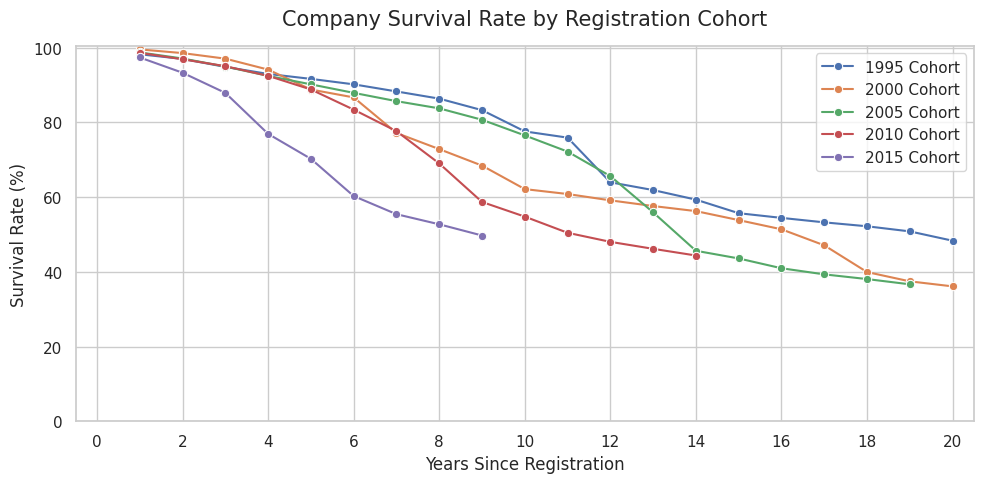

In [19]:
# Company Survival Rate by Registration Cohort plot
sns.set_theme(style="whitegrid")

current_analysis_date = pd.to_datetime('2024-12-31')

df_data_copy = df_data.copy()
df_data_copy['registered'] = pd.to_datetime(df_data_copy['registered'], errors='coerce')
df_data_copy['terminated'] = pd.to_datetime(df_data_copy['terminated'], errors='coerce')
df_analysis_data = df_data_copy.dropna(subset=['registered']).copy()

cohorts_to_plot = [1995, 2000, 2005, 2010, 2015]
survival_data = []
max_tracking_years = 20

print(f"Cohorts to analyze: {cohorts_to_plot}")

for cohort_year in cohorts_to_plot:
    cohort_df = df_analysis_data[df_analysis_data['registered'].dt.year == cohort_year]
    total_in_cohort = len(cohort_df)

    if total_in_cohort == 0:
        print(f"No companies found for cohort year {cohort_year}, skipping.")
        continue
    for year_after in range(1, max_tracking_years + 1):
        termination_cutoff_date = pd.to_datetime(f"{cohort_year + year_after}-12-31")
        period_start_date = pd.to_datetime(f"{cohort_year + year_after}-01-01")

        if period_start_date > current_analysis_date:
            break
        terminated_count = len(cohort_df[
            (cohort_df['terminated'].notna()) &
            (cohort_df['terminated'] <= termination_cutoff_date)
        ])
        survival_rate = (total_in_cohort - terminated_count) / total_in_cohort * 100
        survival_data.append({
            'cohort_label': f'{cohort_year} Cohort', # Formatted label for hue
            'years_after': year_after,
            'survival_rate': survival_rate
        })

if not survival_data:
    print("⚠️ No survival data was generated. Check cohort definitions and data range.")
    survival_df = pd.DataFrame(columns=['cohort_label', 'years_after', 'survival_rate'])
else:
    survival_df = pd.DataFrame(survival_data)

print("\n--- Cohort Survival Rate Report (%) ---")
if not survival_df.empty:
    report_pivot = survival_df.pivot_table(
        index='years_after',
        columns='cohort_label',
        values='survival_rate'
    ).round(1)

    milestones = [1, 5, 10, 15, 20]
    milestones_in_report = [m for m in milestones if m in report_pivot.index]
    if milestones_in_report:
        print(report_pivot.loc[milestones_in_report].fillna('-'))
    else:
        print("Not enough data for milestone report (e.g., no cohort has reached 1 year of tracking within analysis period).")
else:
    print("No survival data calculated to report.")
print("-------------------------------------\n")

fig, ax = plt.subplots(figsize=(10, 5))
if not survival_df.empty:
    hue_order_labels = [f'{c} Cohort' for c in cohorts_to_plot]
    sns.lineplot(
        data=survival_df,
        x='years_after',
        y='survival_rate',
        hue='cohort_label',
        hue_order=hue_order_labels,
        marker='o',
        ax=ax,
        linewidth=1.5,
        markersize=6
    )

    ax.set_title('Company Survival Rate by Registration Cohort', fontsize=15, pad=15)
    ax.set_xlabel('Years Since Registration', fontsize=12)
    ax.set_ylabel('Survival Rate (%)', fontsize=12)
    ax.set_ylim(0, 100.5)

    if not survival_df['years_after'].empty:
        min_x = 0 # Start x-axis at 0
        max_x = survival_df['years_after'].max()
        ax.set_xticks(np.arange(min_x, max_x + 1, 2 if max_x > 10 else 1))
        ax.set_xlim(min_x - 0.5, max_x + 0.5)
    current_legend = ax.get_legend()
    if current_legend:
        current_legend.set_title(None)
else:
    ax.set_title('Company Survival Rate by Registration Cohort', fontsize=15, pad=15)
    ax.text(0.5, 0.5, "No survival data available to plot.",
            horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    print("⚠️ No survival data available to generate the plot.")

plt.tight_layout()
plt.show()

## **First-Year "Infant Mortality" Rate of New Companies**

* The "Infant Mortality" Rate of New Businesses. The Question: We know many businesses fail early, but has the risk for a brand-new company changed over time? What percentage of companies fail within their very first year, and how has this "infant mortality" rate evolved?

### **Key Observations & Analysis:**

**1. The Early 90s - "Born in Chaos" (1990-1996):**

* The 0.00% rate in 1990 is best viewed as an artifact of the brand-new business registration system in the year of restored independence; administrative capacity to record early failures was likely minimal.
* The rate then spikes to 1.79% for companies started in 1991. This high figure vividly reflects the extreme economic turbulence, legal uncertainty, and institutional transition as Latvia fully re-established its independence.
* The following years (1992-1996) show fluctuating but generally moderate failure rates (0.51% - 1.09%), higher than the period that would immediately follow.

**2. The "Quiet Years" - Artificially Low Recorded Failures (1997-2001):**

* This period exhibits remarkably low first-year failure rates, ranging from just 0.16% (1999) to 0.27% (1998).
* This "golden age of survival" is most likely due to administrative lag in the Enterprise Register at the time. New businesses that failed in practice were probably not officially liquidated and recorded as terminated within their first year, making the recorded failure rate appear exceptionally low.

**3. The Build-Up and the First Major Shock (2002-2009):**

* From 2002 (0.52%) to 2007 (0.83%), there's a gradual but clear rise in the infant mortality rate. This coincides with a period of rapid economic growth and credit expansion in Latvia (the "boom years").
* The impact of the Global Financial Crisis is stark: companies started in 2008 and 2009 faced a significantly higher first-year failure rate of 1.27% and 1.25% respectively. This directly shows the severe, immediate impact of the crisis on businesses "born in the storm."

**4. Steadily Increasing Risk in the Last Decade (2010-2023):**

* The most striking feature in this recent period is the clear and substantial upward trend in the first-year failure rate. It started at 0.76% for companies registered in 2010 and climbed to an all-time high of 2.21% for those started in 2023. This means the risk of a new business failing within its first year has nearly tripled over this period.
* The 2024 figure (1.71%) shows a slight dip from the 2023 peak, but it's still significantly higher than the rates seen at the beginning of the 2010s.

**5. Likely Reasons for the Recent Upward Trend:**

* Faster Regulatory Action: The Latvian Enterprise Register has become more efficient over the years, particularly after the 2016-2019 cleanup initiative. New businesses that are non-compliant or non-viable are likely identified and officially terminated much more quickly now than in the past. This means a failure that might have taken years to be officially recorded previously is now more likely to fall within the "first-year" statistic.
* Increased Economic Volatility: The period from 2010 onwards has seen recovery from a global crisis, followed by new economic headwinds including the COVID-19 pandemic, subsequent supply chain issues, inflation, and the energy crisis. These factors create a more challenging and uncertain environment for new ventures to establish themselves.

**6. The 2023 Peak (2.21%):**

* This cohort, started in 2023, faced its first year during a period marked by high inflation and energy costs across Europe, alongside ongoing geopolitical uncertainties. These challenging macroeconomic conditions likely contributed to this record-high infant mortality rate.

**In Summary:** The complete timeline shows that the risk for a new startup in Latvia has varied dramatically. It began with high instability, was followed by a period where recorded failures were artificially low (likely due to administrative inefficiencies), then saw the clear impact of the 2008 global crisis, and has now transitioned into a modern era where faster regulatory processes and economic pressures have led to the highest recorded first-year failure rates.

Analyzing cohort years from 1990 to 2024...


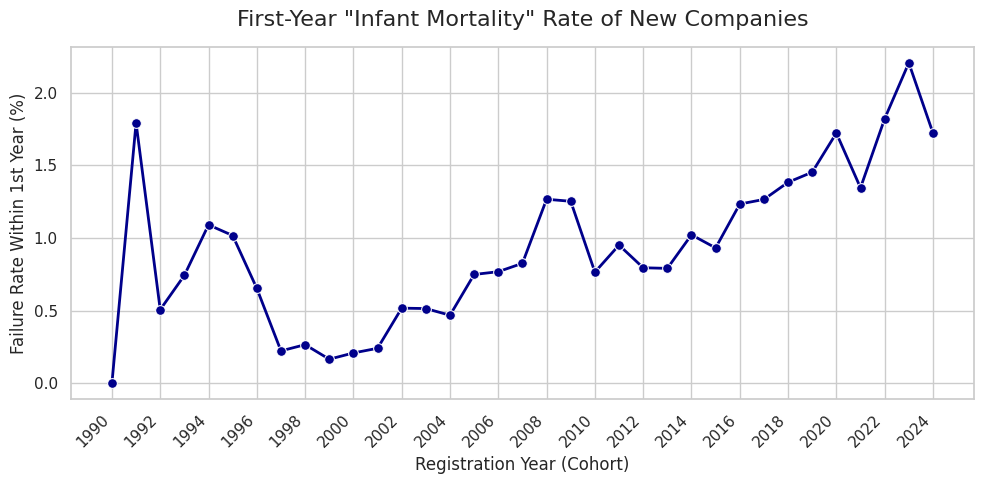

In [20]:
# Infant Mortality Rate plot
sns.set_theme(style="whitegrid")

df_analysis_copy = df_data.copy() # Work on a copy
df_analysis_copy['registered'] = pd.to_datetime(df_analysis_copy['registered'], errors='coerce')
df_analysis_copy['terminated'] = pd.to_datetime(df_analysis_copy['terminated'], errors='coerce')
df_mortality_analysis = df_analysis_copy.dropna(subset=['registered']).copy()

if df_mortality_analysis.empty or df_mortality_analysis['registered'].dt.year.empty:
    print("⚠️ No registration data available to determine cohort years. Cannot proceed.")
    mortality_df = pd.DataFrame(columns=['year', 'failure_rate'])
else:
    cohort_years = sorted(df_mortality_analysis['registered'].dt.year.unique())
    mortality_data = []
    print(f"Analyzing cohort years from {min(cohort_years)} to {max(cohort_years)}...")

    for year in cohort_years:
        cohort_df = df_mortality_analysis[df_mortality_analysis['registered'].dt.year == year]
        total_in_cohort = len(cohort_df)

        if total_in_cohort == 0:
            mortality_data.append({'year': int(year), 'failure_rate': float('nan')})
            continue
        one_year_later_delta = timedelta(days=365)
        valid_lifespan_cohort_df = cohort_df.dropna(subset=['registered', 'terminated'])
        failed_in_first_year = valid_lifespan_cohort_df[
            (valid_lifespan_cohort_df['terminated'] - valid_lifespan_cohort_df['registered']) <= one_year_later_delta
        ]
        failure_count = len(failed_in_first_year)
        failure_rate = (failure_count / total_in_cohort) * 100 if total_in_cohort > 0 else 0
        mortality_data.append({'year': int(year), 'failure_rate': failure_rate})

    mortality_df = pd.DataFrame(mortality_data)
    mortality_df.dropna(subset=['failure_rate'], inplace=True)

fig, ax = plt.subplots(figsize=(10, 5))
if not mortality_df.empty:
    sns.lineplot(
        data=mortality_df,
        x='year',
        y='failure_rate',
        ax=ax,
        color='darkblue',
        marker='o',
        markersize=7,
        linewidth=2
    )

    ax.set_title('First-Year "Infant Mortality" Rate of New Companies', fontsize=16, pad=15)
    ax.set_xlabel('Registration Year (Cohort)', fontsize=12)
    ax.set_ylabel('Failure Rate Within 1st Year (%)', fontsize=12)

    if len(mortality_df['year']) > 1:
        start_yr = int(mortality_df['year'].min())
        end_yr = int(mortality_df['year'].max())
        num_years_total = end_yr - start_yr + 1

        tick_step = 1
        if num_years_total > 20:
            tick_step = max(1, num_years_total // 15)
        elif num_years_total > 10:
            tick_step = 2

        ax.set_xticks(np.arange(start_yr, end_yr + 1, tick_step).astype(int))
        plt.xticks(rotation=45, ha='right')
    elif len(mortality_df['year']) == 1:
        ax.set_xticks([int(mortality_df['year'].iloc[0])])

else:
    ax.set_title('First-Year "Infant Mortality" Rate of New Companies', fontsize=16, pad=15)
    ax.set_xlabel('Registration Year (Cohort)', fontsize=12)
    ax.set_ylabel('Failure Rate Within 1st Year (%)', fontsize=12)
    ax.text(0.5, 0.5, "No data available to generate the plot.",
            horizontalalignment='center', verticalalignment='center',
            transform=ax.transAxes, fontsize=12)
    print("⚠️ No data available to generate the plot (mortality_df is empty).")

plt.tight_layout()
plt.show()

## **Monthly Company Registrations in Latvia - Seasonality Heatmap**

### **Key Observations for the Monthly Company Registrations**

The primary story told by this heatmap is that the **overall economic climate of the year is a much stronger factor than the month**. We can see this in the horizontal bands of color—the bright green years of the early 90s and the post-crisis boom around 2011 stand out regardless of the month.

However, if you look closely down the columns, **a subtle but consistent seasonal tendency does emerge**:

* Strong Start (Jan - Apr): The first few months of the year, particularly January through April, are often slightly brighter than the rest. This suggests a tendency to start new businesses at the beginning of the calendar year.
* Summer Lull (Jun - Jul): The months of June and July frequently appear as a slightly darker, more muted vertical band. This corresponds with the main holiday season in Latvia, including the major Līgo holiday in June, where business activity naturally slows down.

So, while there's no major seasonal swing, the data does suggest a faint, logical rhythm: a busy start to the year, a slight dip for summer holidays, and then a return to a normal pace in the autumn.

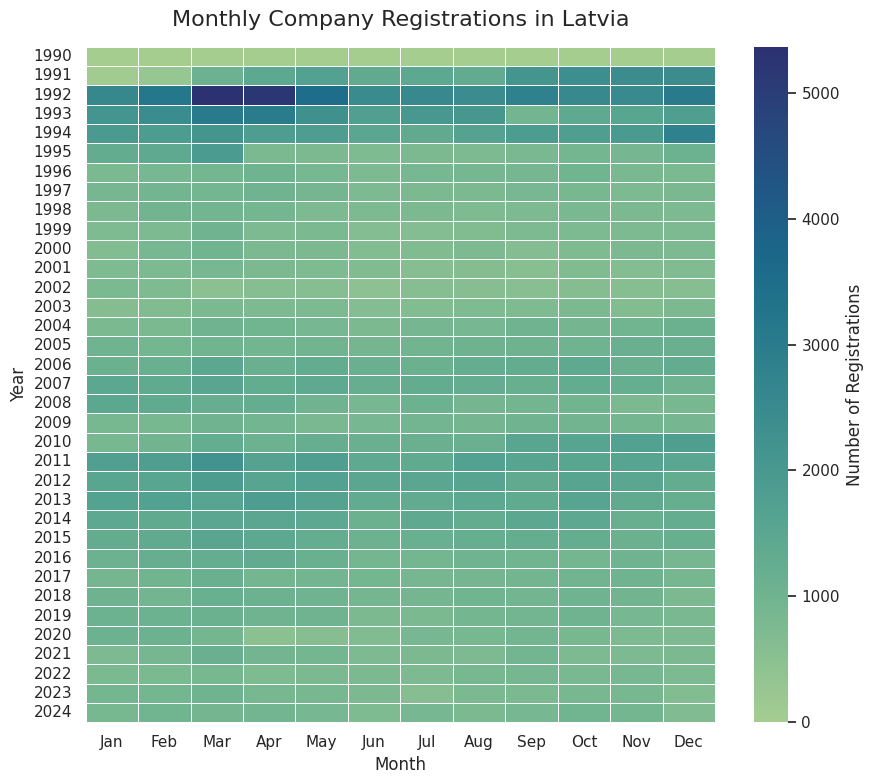

In [21]:
# Monthly Company Registrations Heatmap
sns.set_theme(style="whitegrid")

df_analysis_copy = df_data.copy() # Work on a copy
df_analysis_copy['registered'] = pd.to_datetime(df_analysis_copy['registered'], errors='coerce')
df_heatmap_analysis = df_analysis_copy.dropna(subset=['registered']).copy()

if df_heatmap_analysis.empty:
    print("⚠️ No valid registration data to create heatmap.")
    heatmap_df = pd.DataFrame() # Ensure heatmap_df is defined
else:
    heatmap_df = df_heatmap_analysis.groupby(
        [df_heatmap_analysis['registered'].dt.year.rename('year'),
         df_heatmap_analysis['registered'].dt.month.rename('month')]
    ).size().unstack(fill_value=0)
    heatmap_df = heatmap_df.reindex(columns=range(1, 13), fill_value=0)
    heatmap_df.sort_index(ascending=True, inplace=True)

month_names = []
if not heatmap_df.empty:
    month_names = [calendar.month_abbr[i] for i in range(1, 13)]

fig, ax = plt.subplots(figsize=(9, 8))
if not heatmap_df.empty:
    sns.heatmap(
        heatmap_df,
        ax=ax,
        annot=False,
        fmt="d",
        cmap='crest',
        linewidths=.5,
        xticklabels=month_names,
        cbar_kws={'label': 'Number of Registrations'}
    )

    ax.set_title('Monthly Company Registrations in Latvia', fontsize=16, pad=15)
    ax.set_xlabel('Month', fontsize=12)
    ax.set_ylabel('Year', fontsize=12)
    plt.yticks(rotation=0)

else:
    ax.set_title('Monthly Company Registrations in Latvia', fontsize=16, pad=15)
    ax.set_xlabel('Month', fontsize=12)
    ax.set_ylabel('Year', fontsize=12)
    ax.text(0.5, 0.5, "No data available to generate the heatmap.",
            horizontalalignment='center', verticalalignment='center',
            transform=ax.transAxes, fontsize=12)
    print("⚠️ No data available to generate the heatmap (heatmap_df is empty).")

plt.tight_layout()
plt.show()

## **Total Company Registrations by Day of the Week**

### **Key Observations The Weekday Divide**

* As expected, business registrations are almost exclusively a weekday affair. Monday through Friday account for 99% of all activity, which aligns perfectly with the standard operating hours of the Enterprise Register. The negligible numbers on Saturday and Sunday are likely from automated online submissions.

* The "Twin Peaks" of Tuesday and Thursday: The most interesting insight is that the workload is not evenly distributed across the week. Tuesday and Thursday are the clear peak days, each accounting for nearly 21% of all registrations.

* A Quieter Start and End to the Week: Monday, Wednesday, and Friday are noticeably slower. Monday, in particular, is the quietest weekday.

,Total Registrations,Percentage
reg_day_of_week,,
Monday,88346,18.89
Tuesday,97735,20.90
Wednesday,90284,19.31
Thursday,97770,20.91
Friday,88828,19.00
Saturday,4294,0.92
Sunday,340,0.07


------------------------------------------



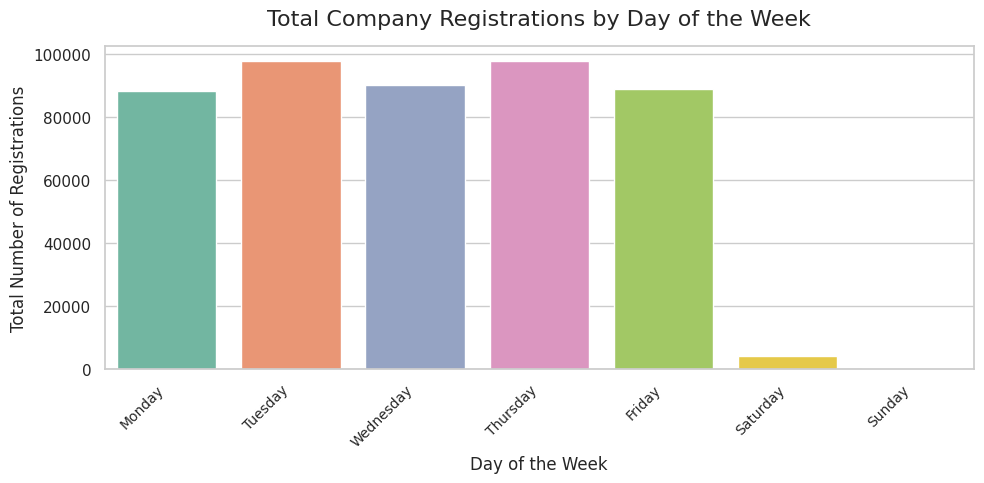

In [22]:
# Company Registrations by Day of the Week Bar Plot and report
sns.set_theme(style="whitegrid")

df_analysis_copy = df_data.copy()
df_analysis_copy['registered'] = pd.to_datetime(df_analysis_copy['registered'], errors='coerce')
df_day_analysis = df_analysis_copy.dropna(subset=['registered']).copy()

if not df_day_analysis.empty:
    df_day_analysis['reg_day_of_week'] = df_day_analysis['registered'].dt.day_name()
else:
    df_day_analysis['reg_day_of_week'] = pd.Series(dtype='object')

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

if not df_day_analysis.empty and not df_day_analysis['reg_day_of_week'].empty:
    day_counts = df_day_analysis['reg_day_of_week'].value_counts()
    day_percentages = df_day_analysis['reg_day_of_week'].value_counts(normalize=True) * 100
    day_report_df = pd.DataFrame({
        'Total Registrations': day_counts,
        'Percentage': day_percentages.round(2)
    }).reindex(day_order).fillna(0)
else:
    day_report_df = pd.DataFrame(columns=['Total Registrations', 'Percentage'], index=day_order).fillna(0)
try:
    display(day_report_df)
except NameError:
    print(day_report_df.to_string())
print("------------------------------------------\n")

fig, ax = plt.subplots(figsize=(10, 5))
if not day_report_df.empty:
    sns.barplot(
        x=day_report_df.index,
        y='Total Registrations',
        data=day_report_df,
        ax=ax,
        palette="Set2",
        order=day_order
    )

    ax.set_title('Total Company Registrations by Day of the Week', fontsize=16, pad=15)
    ax.set_xlabel('Day of the Week', fontsize=12)
    ax.set_ylabel('Total Number of Registrations', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)

else:
    ax.set_title('Total Company Registrations by Day of the Week', fontsize=16, pad=15)
    ax.set_xlabel('Day of the Week', fontsize=12)
    ax.set_ylabel('Total Number of Registrations', fontsize=12)
    ax.text(0.5, 0.5, "No data available to generate the plot.",
            horizontalalignment='center', verticalalignment='center',
            transform=ax.transAxes, fontsize=12)
    print("⚠️ No data available to generate the plot (day_report_df is empty).")

plt.tight_layout()
plt.show()

# 📊 TOP 20 ENTITIES BY MAIN COMPANY TYPE

In [23]:
sns.set_theme(style="whitegrid")

current_date = pd.to_datetime('2024-12-31')

df_data_copy = df_data.copy()
df_data_copy['registered'] = pd.to_datetime(df_data_copy['registered'], errors='coerce')
df_data_copy['terminated'] = pd.to_datetime(df_data_copy['terminated'], errors='coerce')
df_active = df_data_copy[df_data_copy['terminated'].isna()].copy()
df_active.dropna(subset=['registered'], inplace=True)
if not df_active.empty:
    df_active['age'] = (current_date - df_active['registered']).dt.days / 365.25
else:
    df_active['age'] = pd.Series(dtype='float64')

entity_type_text_filter = 'Sabiedrība ar ierobežotu atbildību'
entity_type_display_name = 'SIA'
type_specific_df = df_active[df_active['type_text'] == entity_type_text_filter]

if type_specific_df.empty:
    top_20_df = pd.DataFrame(columns=['name', 'age', 'registered']) # Empty df for report
else:
    top_20_df = type_specific_df.sort_values('age', ascending=False).head(20)

if not top_20_df.empty:
    report_table_df = top_20_df[['name', 'age', 'registered']].copy()
    report_table_df.rename(columns={
        'name': 'Company Name',
        'age': 'Age (Years)',
        'registered': 'Registration Date'
    }, inplace=True)
    styled_table = report_table_df.style \
        .bar(subset=['Age (Years)'], color='skyblue', align='left') \
        .format({
            'Age (Years)': '{:.1f}',
            'Registration Date': '{:%Y-%m-%d}'
        }) \
        .set_caption(f"Top 20 Oldest Active {entity_type_display_name} Companies") \
        .set_properties(**{'text-align': 'left'}) \
        .set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

    display(styled_table)
else:
    print(f"No data to display for '{entity_type_display_name}'.")

,Company Name,Age (Years),Registration Date
176587,"Sabiedrība ar ierobežotu atbildību ""AUGSTCELTNE""",33.9,1991-02-02
340382,"Sabiedrība ar ierobežotu atbildību ""LATGĀZE""",33.9,1991-02-06
310484,"Sabiedrība ar ierobežotu atbildību ""RAITA""",33.9,1991-02-16
175056,"Sabiedrība ar ierobežotu atbildību Rīgas pilsētas firma ""ADREN""",33.9,1991-02-20
276289,"Sabiedrība ar ierobežotu atbildību ""BALTIJAS BANKNOTE""",33.9,1991-02-21
94849,"Sabiedrība ar ierobežotu atbildību ""KRS""",33.9,1991-02-21
378158,"Sabiedrība ar ierobežotu atbildību ""BALTOGLES""",33.9,1991-02-21
386905,"Sabiedrība ar ierobežotu atbildību ""LATVIAN BUSINESS COMPANY (""LBC"")""",33.9,1991-02-23
386086,"SIA ""Smartlab Polymers""",33.8,1991-02-27
298452,"Sabiedrība ar ierobežotu atbildību ""DAV""",33.8,1991-02-27


In [24]:
sns.set_theme(style="whitegrid")

current_date = pd.to_datetime('2024-12-31')

df_data_copy = df_data.copy()
df_data_copy['registered'] = pd.to_datetime(df_data_copy['registered'], errors='coerce')
df_data_copy['terminated'] = pd.to_datetime(df_data_copy['terminated'], errors='coerce')
df_active = df_data_copy[df_data_copy['terminated'].isna()].copy()
df_active.dropna(subset=['registered'], inplace=True)
if not df_active.empty:
    df_active['age'] = (current_date - df_active['registered']).dt.days / 365.25
else:
    df_active['age'] = pd.Series(dtype='float64')

entity_type_text_filter = 'Zemnieku saimniecība'
entity_type_display_name = 'Zemnieku Saimniecība'

type_specific_df = df_active[df_active['type_text'] == entity_type_text_filter]

if type_specific_df.empty:
    top_20_df = pd.DataFrame(columns=['name', 'age', 'registered'])
else:
    top_20_df = type_specific_df.sort_values('age', ascending=False).head(20)

if not top_20_df.empty:
    report_table_df = top_20_df[['name', 'age', 'registered']].copy()
    report_table_df.rename(columns={
        'name': 'Company Name',
        'age': 'Age (Years)',
        'registered': 'Registration Date'
    }, inplace=True)

    styled_table = report_table_df.style \
        .bar(subset=['Age (Years)'], color='skyblue', align='left') \
        .format({
            'Age (Years)': '{:.1f}',
            'Registration Date': '{:%Y-%m-%d}'
        }) \
        .set_caption(f"Top 20 Oldest Active {entity_type_display_name} Companies") \
        .set_properties(**{'text-align': 'left'}) \
        .set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

    display(styled_table)
else:
    print(f"No data to display for '{entity_type_display_name}'.")

,Company Name,Age (Years),Registration Date
182474,"Zemnieku saimniecība ""CĪRUĻI""",33.9,1991-02-15
272303,"Zemnieku saimniecība ""SALMAŅI""",33.7,1991-04-10
272304,"Griškānu pagasta zemnieku saimniecība ""REIKI""",33.7,1991-04-16
148569,"Dricānu pagasta zemnieku saimniecība ""DZĒRVES""",33.7,1991-05-05
133015,"Dricānu pagasta zemnieku saimniecība ""GRAŠI""",33.7,1991-05-08
148632,"Kantinieku pagasta zemnieku saimniecība ""MEŽMALAS""",33.7,1991-05-08
262399,"Kuldīgas rajona zemnieku saimniecība ""MAILĪTES""",33.6,1991-05-21
148626,"Zemnieku saimniecība ""SPĒLNIEKI""",33.6,1991-05-22
133038,"Zemnieku saimniecība ""IEVAS""",33.6,1991-05-23
133042,"Silmalas pagasta zemnieku saimniecība ""VĀRPA""",33.6,1991-05-23


In [25]:
sns.set_theme(style="whitegrid")

current_date = pd.to_datetime('2024-12-31')

df_data_copy = df_data.copy()
df_data_copy['registered'] = pd.to_datetime(df_data_copy['registered'], errors='coerce')
df_data_copy['terminated'] = pd.to_datetime(df_data_copy['terminated'], errors='coerce')
df_active = df_data_copy[df_data_copy['terminated'].isna()].copy()
df_active.dropna(subset=['registered'], inplace=True)
if not df_active.empty:
    df_active['age'] = (current_date - df_active['registered']).dt.days / 365.25
else:
    df_active['age'] = pd.Series(dtype='float64')

entity_type_text_filter = 'Akciju sabiedrība'
entity_type_display_name = 'Akciju Sabiedrība (AS)'

type_specific_df = df_active[df_active['type_text'] == entity_type_text_filter]
if type_specific_df.empty:
    print(f"No active companies of type_text '{entity_type_text_filter}' found.")
    top_20_df = pd.DataFrame(columns=['name', 'age', 'registered'])
else:
    top_20_df = type_specific_df.sort_values('age', ascending=False).head(20)

if not top_20_df.empty:
    report_table_df = top_20_df[['name', 'age', 'registered']].copy()
    report_table_df.rename(columns={
        'name': 'Company Name',
        'age': 'Age (Years)',
        'registered': 'Registration Date'
    }, inplace=True)

    styled_table = report_table_df.style \
        .bar(subset=['Age (Years)'], color='skyblue', align='left') \
        .format({
            'Age (Years)': '{:.1f}',
            'Registration Date': '{:%Y-%m-%d}'
        }) \
        .set_caption(f"Top 20 Oldest Active {entity_type_display_name} Companies") \
        .set_properties(**{'text-align': 'left'}) \
        .set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

    display(styled_table)
else:
    print(f"No data to display for '{entity_type_display_name}'.")

,Company Name,Age (Years),Registration Date
451632,"Akciju sabiedrība ""Dobeles dzirnavnieks""",34.0,1991-01-18
455057,Akciju sabiedrība ROYAL INVESTMENT GROUP,33.9,1991-01-24
419333,"Akciju sabiedrība ""ALFA""",33.9,1991-02-01
91040,"Akciju sabiedrība ""Latvijas Gāze""",33.8,1991-03-25
412695,"AS ""RĪGAS FARMACEITISKĀ FABRIKA""",33.8,1991-03-26
121530,"Akciju sabiedrība ""VEF""",33.7,1991-04-15
221244,"Akciju sabiedrība ""UPB""",33.7,1991-04-26
414495,"akciju sabiedrība ""Latvijas nafta""",33.7,1991-05-08
427513,"Akciju sabiedrība ""LATVIJAS KUĢNIECĪBA""",33.6,1991-05-09
404587,"Akciju sabiedrība ""UNIVERSAL""",33.6,1991-05-16


☑️ **Conclusion**

This notebook began with a simple question: What stories are hidden in over 30 years of business registration data? Through a comprehensive exploratory data analysis, we've pieced together a compelling narrative of Latvia's economic and institutional evolution since regaining its independence.
Ultimately, this project demonstrates that a simple business register is more than just a list of names and dates; it's a rich historical document that, with the right tools and questions, can tell the story of a nation's journey.

⚛️ **Thank You & Upvote**

Thank you for exploring this analysis with me! This has been a fascinating journey through Latvia's economic history.

If you found this notebook insightful or learned something new, please consider **leaving an upvote - it's a great motivator!**

I welcome any feedback, questions, or suggestions for further analysis you might have in the comments below. Feel free to fork this notebook and continue the exploration on your own.

In [29]:
%%shell
jupyter nbconvert --to html "/content/Kaggle_EDA_of_LV_Business_Register-400kLLC-1991-2024.ipynb"

[NbConvertApp] WARNING | pattern '/content/Kaggle_EDA_of_LV_Business_Register-400kLLC-1991-2024.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalen

CalledProcessError: Command 'jupyter nbconvert --to html "/content/Kaggle_EDA_of_LV_Business_Register-400kLLC-1991-2024.ipynb"
' returned non-zero exit status 255.